# Exploratory Analysis of Ford GoBike Trip Data
## by Manish Kumar

## Preliminary Wrangling

> Ford GoBike is bicycle sharing service operational in San Francisco Bay Area.It began operation in June 28, 2017.The company provides bike trip information for data analysis perposes. For the current analysis, I have selected one year data from January, 2018 to December 2018.The dataset contains 16 columns and 18,63,721 rows. I hope analysis of one year data will result in some good insights. So, Let's start the process...

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sys
import calendar
from time import time
import math
import matplotlib.cm as cm

%matplotlib inline
sb.set(style="darkgrid")

import warnings
warnings.simplefilter("ignore")

In [2]:
print("Python Version:  "+sys.version)
print("Pandas Version:  "+pd.__version__)
print("Seaborn Version: "+sb.__version__)

Python Version:  3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Pandas Version:  0.23.0
Seaborn Version: 0.9.0


In [3]:
#Importing data from csv files which I downloaded from Ford GoBike Share website
files=["201801-fordgobike-tripdata.csv","201802-fordgobike-tripdata.csv","201803-fordgobike-tripdata.csv",
      "201804-fordgobike-tripdata.csv","201805-fordgobike-tripdata.csv","201806-fordgobike-tripdata.csv",
      "201807-fordgobike-tripdata.csv","201808-fordgobike-tripdata.csv","201809-fordgobike-tripdata.csv",
      "201810-fordgobike-tripdata.csv","201811-fordgobike-tripdata.csv","201812-fordgobike-tripdata.csv"]
gobike=pd.DataFrame()

ti=time()
for file in files:
    if gobike.empty:
        gobike=pd.read_csv(file)
    else:
        df=pd.read_csv(file)
        gobike=pd.concat([gobike,df],ignore_index=True)
print("Time Taken:{} Seconds".format(time()-ti)) 

Time Taken:33.13489556312561 Seconds


In [4]:
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [5]:
# Checking structure of the dataset
gobike.shape

(1863721, 16)

In [6]:
#Checking for Null Values
sum(gobike.member_birth_year.isnull())

110718

In [7]:
#Checking for Null Values
sum(gobike.member_gender.isnull())

110367

In [8]:
#Checking for Null Values
sum(gobike.member_birth_year.isnull() & gobike.member_gender.isnull())

110367

In [9]:
#Drop rows which have Null values for member_birth_year
gobike.dropna(inplace=True)

In [10]:
# Checking datatype and missing valies, if any
gobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1741556 entries, 0 to 1863719
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 225.9+ MB


> An info() analysis shows that some of the columns data type is not correct and needs to be changed.
  1.start_time, end_time should be datetime
  2.member_birth_year,start_station_id, end_station_id should be int.

In [11]:
#Changing 'start_time' to datetime.
gobike['start_time']=pd.to_datetime(gobike['start_time'])

In [12]:
#Changing 'end_time' to endtime.
gobike['end_time']=pd.to_datetime(gobike['end_time'])

In [13]:
#Changing 'member_birth_year' to int.
gobike['member_birth_year']=gobike['member_birth_year'].astype(int)

In [14]:
#Changing 'start_station_id' to int.
gobike['start_station_id']=gobike['start_station_id'].astype(int)

In [15]:
#Changing 'end_station_end' to int.
gobike['end_station_id']=gobike['end_station_id'].astype(int)

In [16]:
gobike.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int32
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int32
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                   int32
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [17]:
gobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06
mean,7.728624e+02,1.204426e+02,3.776877e+01,-1.223511e+02,1.189243e+02,3.776887e+01,-1.223506e+02,2.292758e+03,1.983061e+03
std,1.943048e+03,1.001721e+02,1.015663e-01,1.193663e-01,1.001915e+02,1.014133e-01,1.187729e-01,1.287598e+03,1.045133e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.440000e+02,3.600000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.221000e+03,1.978000e+03
50%,5.430000e+02,8.900000e+01,3.778107e+01,-1.223971e+02,8.900000e+01,3.778127e+01,-1.223959e+02,2.333000e+03,1.985000e+03
75%,8.390000e+02,1.870000e+02,3.779728e+01,-1.222876e+02,1.860000e+02,3.779728e+01,-1.222894e+02,3.327000e+03,1.991000e+03
max,8.628100e+04,3.810000e+02,3.788022e+01,-1.218333e+02,3.810000e+02,3.788022e+01,-1.218333e+02,6.234000e+03,2.000000e+03


In [18]:
gobike.head(4)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,Male,No
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996,Male,No
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991,Male,No
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988,Male,No


In [19]:
#Add a new column age
gobike['age']=2018-gobike.member_birth_year

In [20]:
#Have a quick look on age distribution
gobike.age.describe().apply(lambda x:format(x,'.1f'))

count    1741556.0
mean          34.9
std           10.5
min           18.0
25%           27.0
50%           33.0
75%           40.0
max          137.0
Name: age, dtype: object

In [21]:
#Dropping 'member_birth_year' column
gobike.drop('member_birth_year',axis=1,inplace=True)

In [22]:
#Calculating distance of the trip using geodistance calculation method called 'haversine'
def geo_distance(lat1, lon1, lat2, lon2):
    R = 6372.8 # Earth Radius in Km
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    #dLat = math.radians(lat2 - lat1)
    #dLon = math.radians(lon2 - lon1)
    #lat1 = math.radians(lat1)
    #lat2 = math.radians(lat2)
    dlat=lat2-lat1
    dlon=lon2-lon1
    #a = math.sin(dLat/2)**2 + math.cos(lat1)*math.cos(lat2)*math.sin(dLon/2)**2
    #c = 2*math.asin(math.sqrt(a))
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    return R * c

In [23]:
%%timeit
#Adding a new column 'distance_km' 
#gobike['distance_km']=gobike.apply(lambda x :geo_distance(x['start_station_latitude'],x['start_station_longitude'],\
#                       x['end_station_latitude'],x['end_station_longitude']),axis=1)
#Optimized version using in-built vectorization technique of numpy
gobike['distance_km']=geo_distance(gobike['start_station_latitude'].values,gobike['start_station_longitude'].values,\
                                   gobike['end_station_latitude'].values,gobike['end_station_longitude'].values)

604 ms ± 2.07 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
gobike['distance_km']=gobike['distance_km'].apply(lambda x :format(x,'.2f'))

In [25]:
gobike['distance_km']=gobike['distance_km'].astype(float)

In [26]:
gobike.distance_km.describe().apply(lambda x:format(x,'.2f'))

count    1741556.00
mean           1.60
std            1.02
min            0.00
25%            0.88
50%            1.38
75%            2.09
max           65.33
Name: distance_km, dtype: object

In [27]:
#Drop columns 'start_station_longitude','start_station_latitude','end_station_longitude','end_station_latitude'
gobike.drop('start_station_longitude',axis=1,inplace=True)
gobike.drop('start_station_latitude',axis=1,inplace=True)
gobike.drop('end_station_longitude',axis=1,inplace=True)
gobike.drop('end_station_latitude',axis=1,inplace=True)

In [28]:
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,age,distance_km
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,285,Webster St at O'Farrell St,2765,Subscriber,Male,No,32,2.49
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,296,5th St at Virginia St,3039,Customer,Male,No,22,2.98
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,19,Post St at Kearny St,617,Subscriber,Male,No,27,2.44
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110,17th & Folsom Street Park (17th St at Folsom St),134,Valencia St at 24th St,3571,Subscriber,Male,No,30,1.34
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81,Berry St at 4th St,93,4th St at Mission Bay Blvd S,1403,Subscriber,Male,No,38,0.63


In [29]:
gobike.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int32
start_station_name                 object
end_station_id                      int32
end_station_name                   object
bike_id                             int64
user_type                          object
member_gender                      object
bike_share_for_all_trip            object
age                                 int32
distance_km                       float64
dtype: object

In [30]:
#Total no of Bikes
gobike.bike_id.nunique()

4853

In [31]:
#Total Number of Start Station Id
gobike.start_station_id.nunique()

331

In [32]:
#Total Number of End Station Id
gobike.end_station_id.nunique()

331

In [33]:
#Trip Taking time
gobike['time']=gobike.start_time.dt.hour

In [34]:
#gobike.groupby('start_station_id').hist()

In [35]:
#Adding Trip Id as a new column
gobike['tripid']=gobike['start_station_id'].astype(str)+'-'+gobike['end_station_id'].astype(str)

In [36]:
print(gobike['tripid'].nunique())

33407


In [37]:
# Creating category based on time
def time_category(t):
    if t>=5 and t<12:
        return "Morning"
    elif t>=12 and t<17:
        return "Afternoon"
    elif t>=17 and t<22:
        return "Evening"
    else:
        return "Night"

In [38]:
#Adding column Time_category
gobike['time_category']=gobike.time.apply(lambda x:time_category(x))

In [39]:
gobike.time_category.value_counts()

Morning      645104
Evening      572850
Afternoon    455090
Night         68512
Name: time_category, dtype: int64

In [40]:
#Adding column weekdays
gobike['weekday']=gobike['start_time'].apply(lambda x:x.weekday_name)

In [41]:
#adding column month
gobike['month']=gobike.start_time.apply(lambda x:calendar.month_name[x.month])

In [42]:
#Adding column age_group
def age_group(a):
    if 17>=a>=0:
        return "Generation-Z(0-17)"
    elif 34>=a>=18:
        return "Millenials(18-34)"
    elif 50>=a>=35:
        return "Generation-X(35-50)"
    else:
        return "Baby Boomers(50+)"    

In [43]:
#Adding column age_group
gobike['age_group']=gobike.age.apply(age_group)

In [44]:
#dropping column 'start_time', 'end_time'
gobike.drop('start_time',axis=1,inplace=True)
gobike.drop('end_time',axis=1,inplace=True)

In [45]:
gobike.head()

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,age,distance_km,time,tripid,time_category,weekday,month,age_group
0,75284,120,Mission Dolores Park,285,Webster St at O'Farrell St,2765,Subscriber,Male,No,32,2.49,22,120-285,Night,Wednesday,January,Millenials(18-34)
2,71576,304,Jackson St at 5th St,296,5th St at Virginia St,3039,Customer,Male,No,22,2.98,14,304-296,Afternoon,Wednesday,January,Millenials(18-34)
4,39966,74,Laguna St at Hayes St,19,Post St at Kearny St,617,Subscriber,Male,No,27,2.44,19,74-19,Evening,Wednesday,January,Millenials(18-34)
6,453,110,17th & Folsom Street Park (17th St at Folsom St),134,Valencia St at 24th St,3571,Subscriber,Male,No,30,1.34,23,110-134,Night,Wednesday,January,Millenials(18-34)
7,180,81,Berry St at 4th St,93,4th St at Mission Bay Blvd S,1403,Subscriber,Male,No,38,0.63,23,81-93,Night,Wednesday,January,Generation-X(35-50)


In [46]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1741556 entries, 0 to 1863719
Data columns (total 17 columns):
duration_sec               int64
start_station_id           int32
start_station_name         object
end_station_id             int32
end_station_name           object
bike_id                    int64
user_type                  object
member_gender              object
bike_share_for_all_trip    object
age                        int32
distance_km                float64
time                       int64
tripid                     object
time_category              object
weekday                    object
month                      object
age_group                  object
dtypes: float64(1), int32(3), int64(3), object(10)
memory usage: 219.2+ MB


In [47]:
#No of trip with distance '0'. These are round trips.
sum(gobike.query('distance_km==0').distance_km.value_counts())

41855

### What is the structure of your dataset?

> The Fordgobike share data contains 18,63,721 rows and 16 columns. Dataset is a good mix of Categorical and Numerical variables

### What is/are the main feature(s) of interest in your dataset?

>As in dataset various quantitative and qualitative variable present. Following questions can be posed:
  1.which stations are getting the most use? \\
  2.which trips are the most popular? \\
  3.how long it’s taking riders to get between various points, and the age and gender of riders? \\
  4.When are most trips taken in terms of time of day, day of the week, or month of the year? \\
  5.How long does the average trip take? Does the above depend on if a user is a subscriber or customer.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>After a thorough exploration the forgobike trip data set, I found that there are many columns which could provide us valuable insights about the trends in the bike sharing system. Duration_sec is one of them using this we have idea about trip duration like whether people prefer a short trip or a day long trip to explore the area using Bike sharing System.The distance calculated between the two station will give roughly idea of upto how much far distance rider prefer bikehsare service. Start_time will give information about at what time of day or month of year or day of month most no of ride trip were taken.Start station and end station will help in check which one is the most busiest station and how far are these station situated. 
Categorical variable such as user_type, member_gender, age will help in getting further insights on various posed questions.

## Univariate Exploration

### 1. What is most frequent trip taken or preferred based on time ?

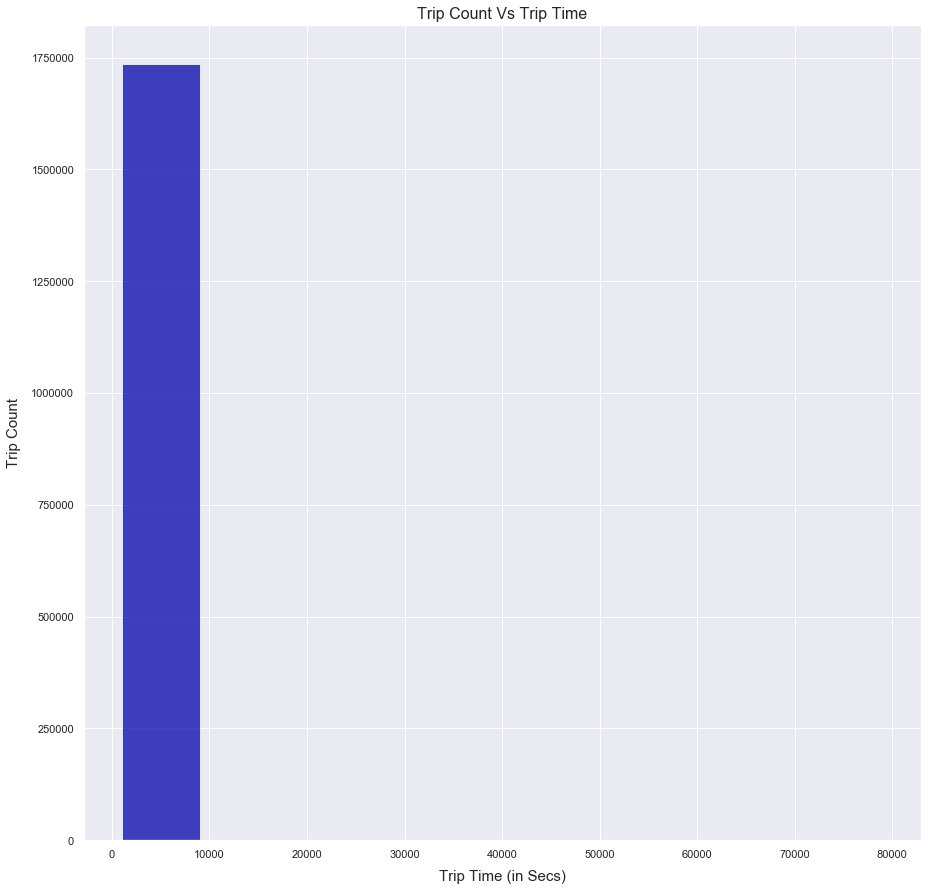

In [48]:
# A Histogram Plot of Trip Duration
plt.figure(figsize=(15,15))
bin_edges=np.arange(0,gobike.duration_sec.max(),10000)
plt.hist(data=gobike,x='duration_sec',bins=bin_edges,color='#0504aa',alpha=0.75,rwidth=0.8);
plt.ylabel('Trip Count', fontsize=15,labelpad=10)
plt.xlabel('Trip Time (in Secs)', fontsize=15,labelpad=10)
plt.title('Trip Count Vs Trip Time', fontsize=16);

> Above Histogram shows presence of outliers.I need to delete those rows to establish 'duration_sec' relation with other columns. 

In [49]:
#Estimation of outliers
sum(gobike.query('duration_sec>=4000').duration_sec.value_counts())

16653

In [50]:
#Deletion of outliers
gobike=gobike[gobike['duration_sec']<4000]

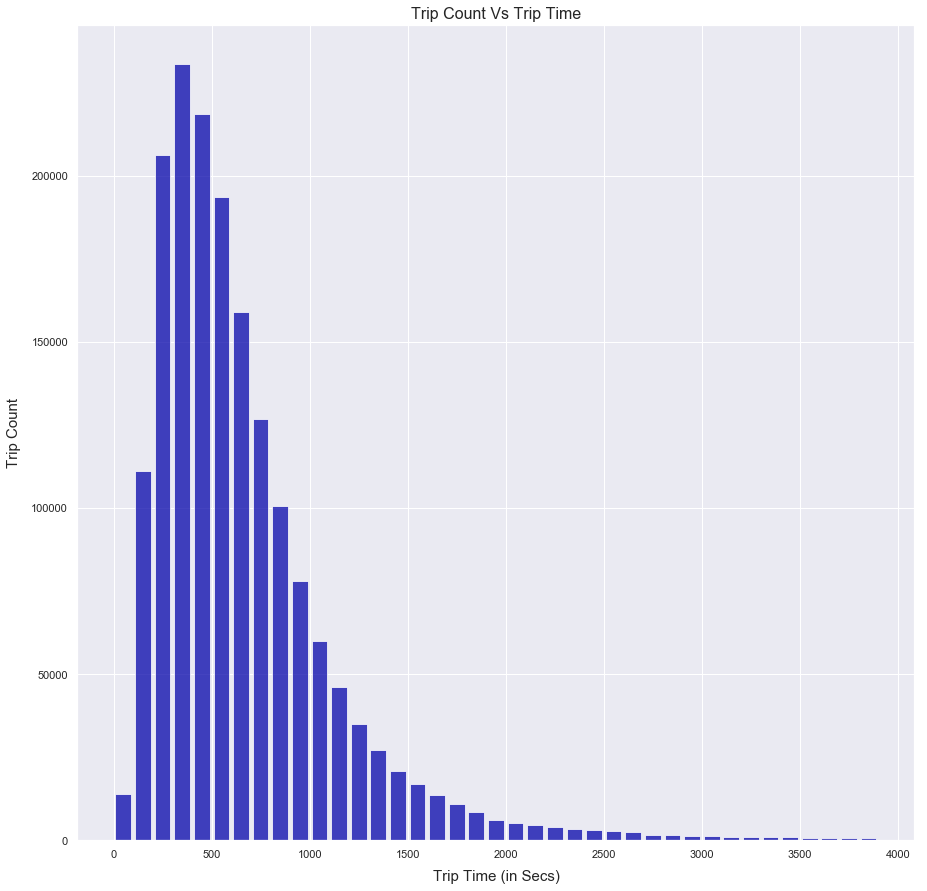

In [51]:
# A Histogram Plot of Trip Duration
plt.figure(figsize=(15,15))
bin_edges=np.arange(0,gobike.duration_sec.max(),100)
plt.hist(data=gobike,x='duration_sec',bins=bin_edges,color='#0504aa',alpha=0.75,rwidth=0.8);
plt.ylabel('Trip Count', fontsize=15,labelpad=10)
plt.xlabel('Trip Time (in Secs)', fontsize=15,labelpad=10)
plt.title('Trip Count Vs Trip Time', fontsize=16);

After removal of Outliers, Now I can see most trip density lies between (0-1500)Sec.Further, variation of trip duration on various parameter like age, gender, time-category, user-type etc needs to be explored.

### 2. How much distance travelled per Bike share trip?

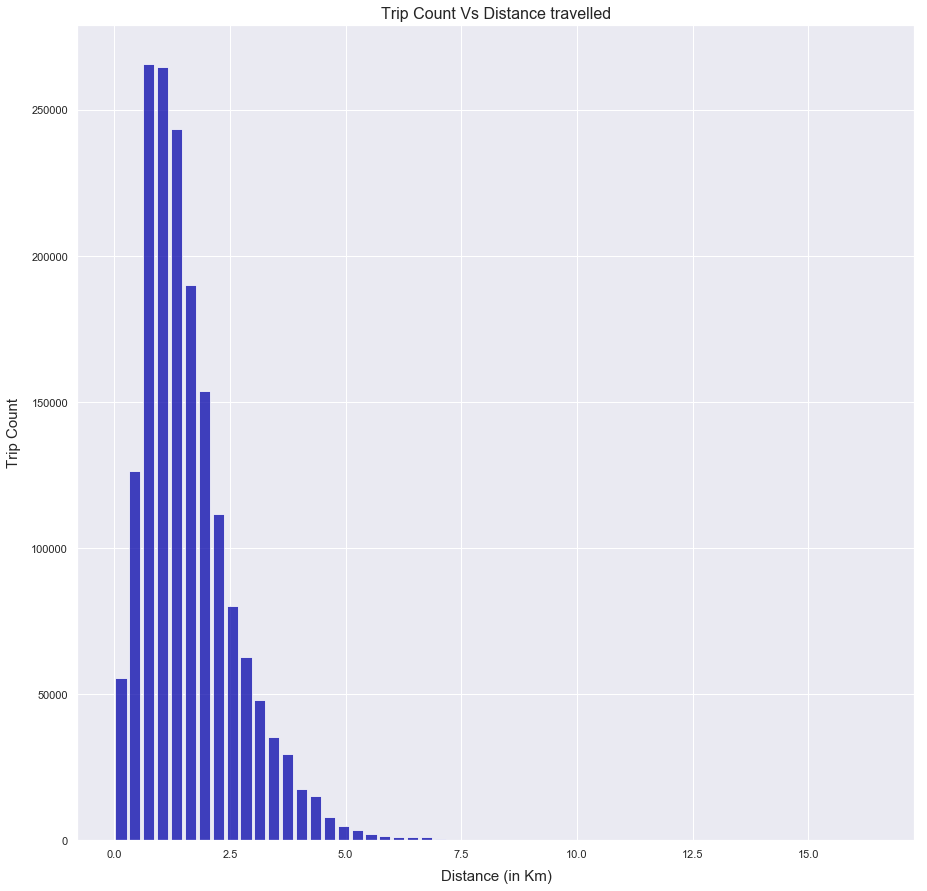

In [52]:
# A Histogram Plot of Distance
plt.figure(figsize=(15,15))
bin_edges=np.arange(0,gobike.distance_km.max(),0.3)
plt.hist(data=gobike,x='distance_km',bins=bin_edges,color='#0504aa',alpha=0.75,rwidth=0.8);
plt.ylabel('Trip Count', fontsize=15,labelpad=10)
plt.xlabel('Distance (in Km)', fontsize=15,labelpad=10)
plt.title('Trip Count Vs Distance travelled', fontsize=16);

> We can see distance travelled in some trip is 0. These are round trips. Start station and end station is same in these cases. As, Longitude and Latidude of station is used in distance calculation so it will come as zero. However, actual distance travelled is not 0, sadly we do not have available data for this. Besides this limitation, 1-5 Kms are most common one, which seems reasonable.Distance above 7 Kms are outliers which can be removed safely

In [53]:
#No of records, distance>7 Km
sum(gobike.query('distance_km>=7').distance_km.value_counts())

1211

In [54]:
#Dropping rows, distance>7 Km
gobike=gobike[gobike['distance_km']<7]

In [55]:
#Dropping rows, distance>7 Km
gobike=gobike[gobike['distance_km']>0]

In [56]:
gobike.distance_km.describe().apply(lambda x:format(x,'.2f'))

count    1685490.00
mean           1.63
std            0.98
min            0.01
25%            0.91
50%            1.40
75%            2.10
max            6.99
Name: distance_km, dtype: object

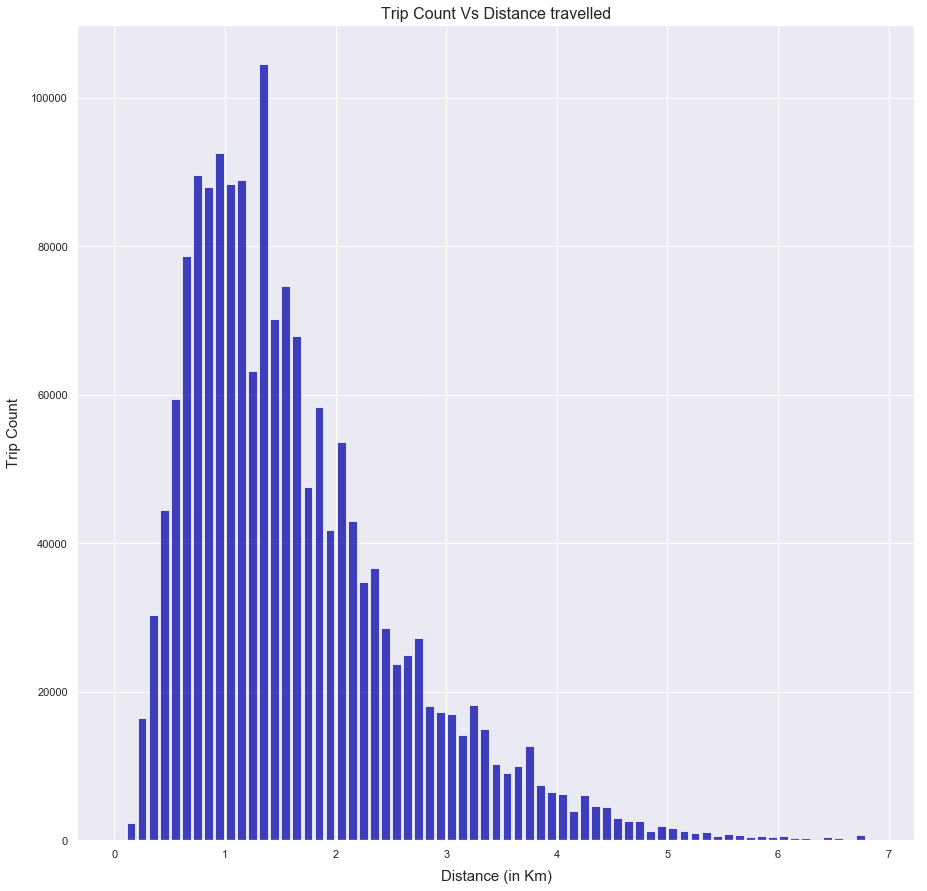

In [57]:
# A Histogram Plot of Distance
plt.figure(figsize=(15,15))
bin_edges=np.arange(0,gobike.distance_km.max(),0.1)
plt.hist(data=gobike,x='distance_km',bins=bin_edges,color='#0504aa',alpha=0.75,rwidth=0.8);
plt.ylabel('Trip Count', fontsize=15,labelpad=10)
plt.xlabel('Distance (in Km)', fontsize=15,labelpad=10)
plt.title('Trip Count Vs Distance travelled', fontsize=16);

>Ater removing outliers, the distribution looks nice and compact. Further, exploraton of distance travelled based on categorical variable would be interesting.

### 3. How is the distribution of member's age?

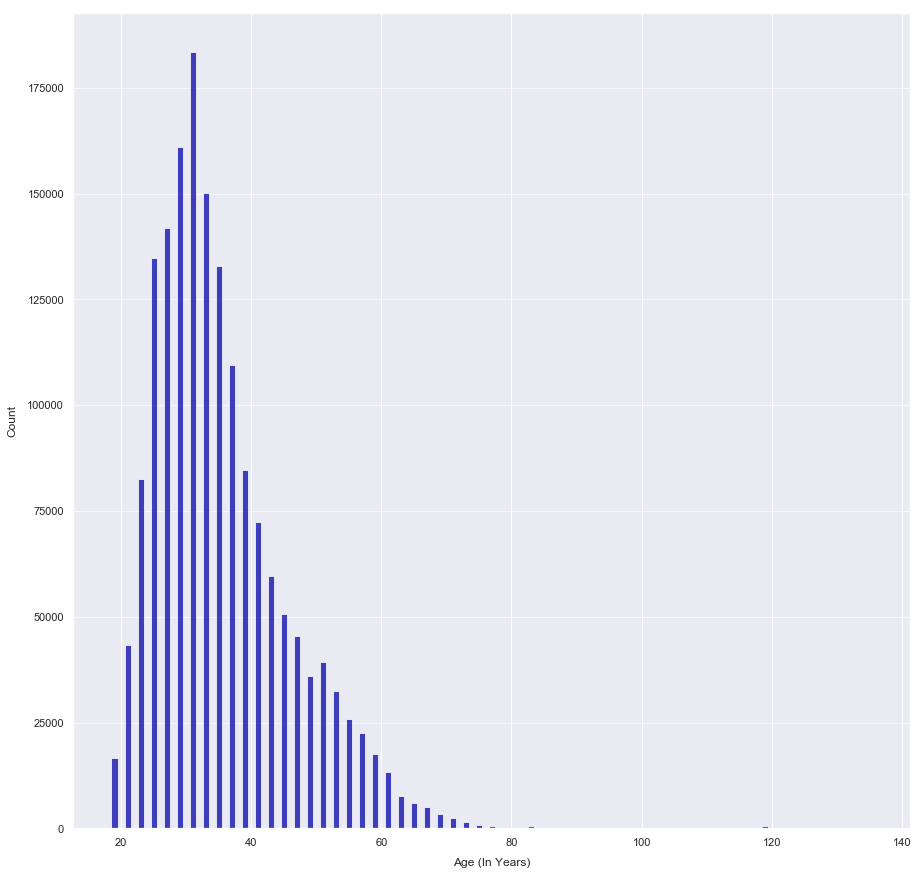

In [58]:
plt.figure(figsize=(15,15))
df=gobike.dropna()
bin_edges=np.arange(df.age.min(),df.age.max(),2)
plt.hist(data=df,x='age',bins=bin_edges,rwidth=0.5,alpha=0.75,color='#0504aa');
plt.grid(axis="y",alpha=0.75)
plt.xlabel('Age (In Years)',labelpad=10)
plt.ylabel('Count',labelpad=10);

> A histogram of 'member_birth_year' shows that some of the riders' age is more than 70 years which seems not reasonable in this case. Also, some missing data is in this column. A possible solution is to remove or discard these rows then see the trends of rest of the data.

In [59]:
#No of rows having age>70
sum(gobike[gobike['age']>=70].age.value_counts())

7558

In [60]:
#Dropping rows having age>70
gobike=gobike[gobike['age']<=70]

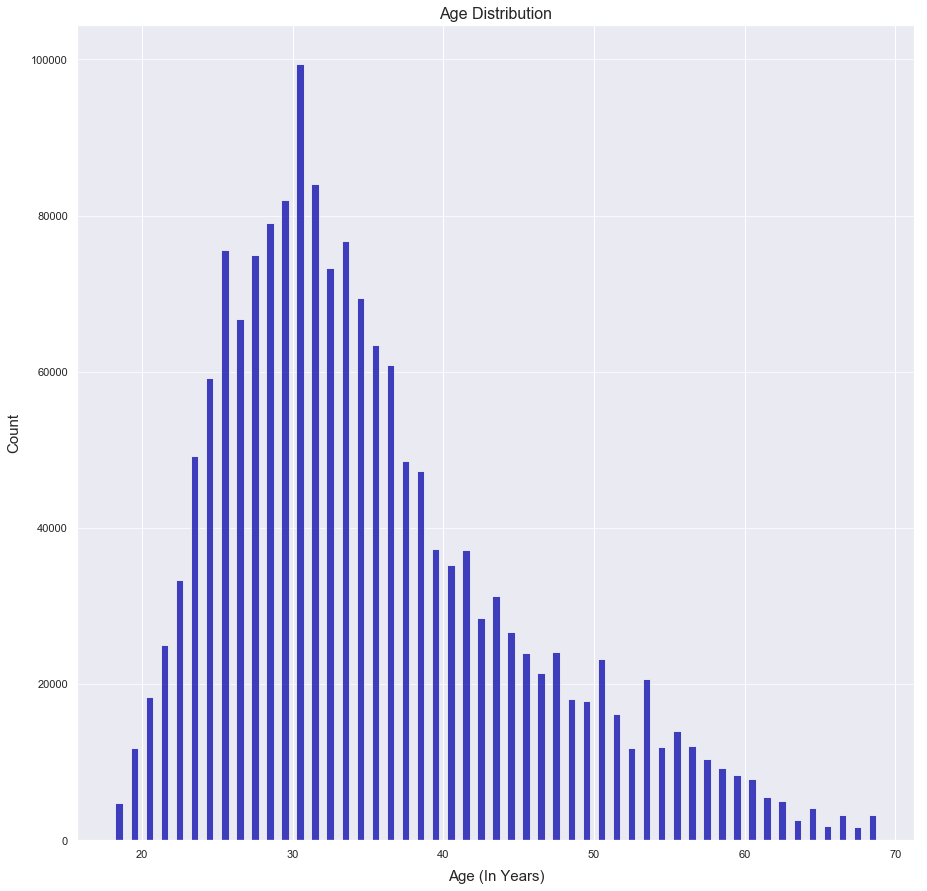

In [61]:
#Redrawing histagram after deletion of outliers
plt.figure(figsize=(15,15))
df=gobike.dropna()
bin_edges=np.arange(df.age.min(),df.age.max(),1)
plt.hist(data=df,x='age',bins=bin_edges,rwidth=0.5,alpha=0.75,color='#0504aa');
plt.grid(axis="y",alpha=0.75)
plt.xlabel('Age (In Years)',labelpad=10,fontsize=15)
plt.ylabel('Count',labelpad=10,fontsize=15);
plt.title("Age Distribution",fontsize=16);

> After deletion of ouliers the Distribution looks refined. Further dividing the age into categories would be good idea to drill down more insights. 

### 4. At what time most people taken for the ride or What is the pick time of the day?

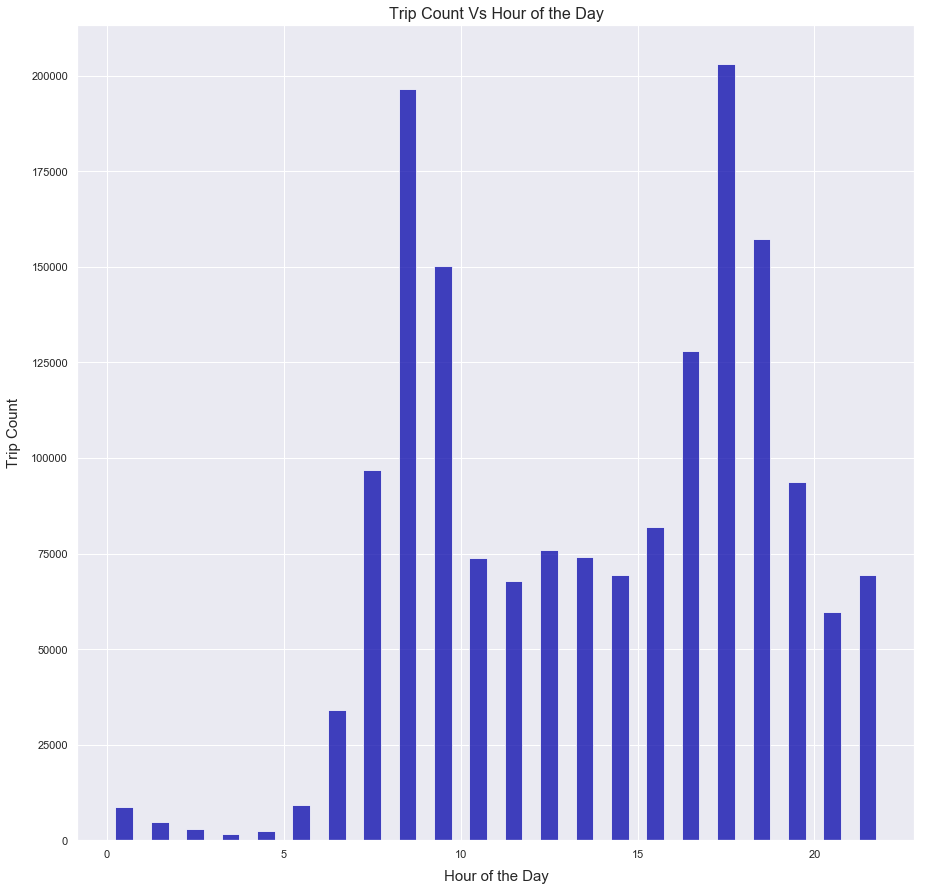

In [62]:
# A Histogram Plot of the Hours of the day
plt.figure(figsize=(15,15))
bin_edges=np.arange(gobike.time.min(),gobike.time.max(),1)
plt.hist(data=gobike,x='time',color='#0504aa',alpha=0.75,rwidth=0.5,bins=bin_edges);
plt.ylabel('Trip Count',fontsize=15,labelpad=10)
plt.xlabel('Hour of the Day',fontsize=15,labelpad=10)
plt.title('Trip Count Vs Hour of the Day',fontsize=16);

> Above plot indicates that most Trips were taken either in morning or in evening session.

### 5. What is the Monthwise Trends of the Trips?

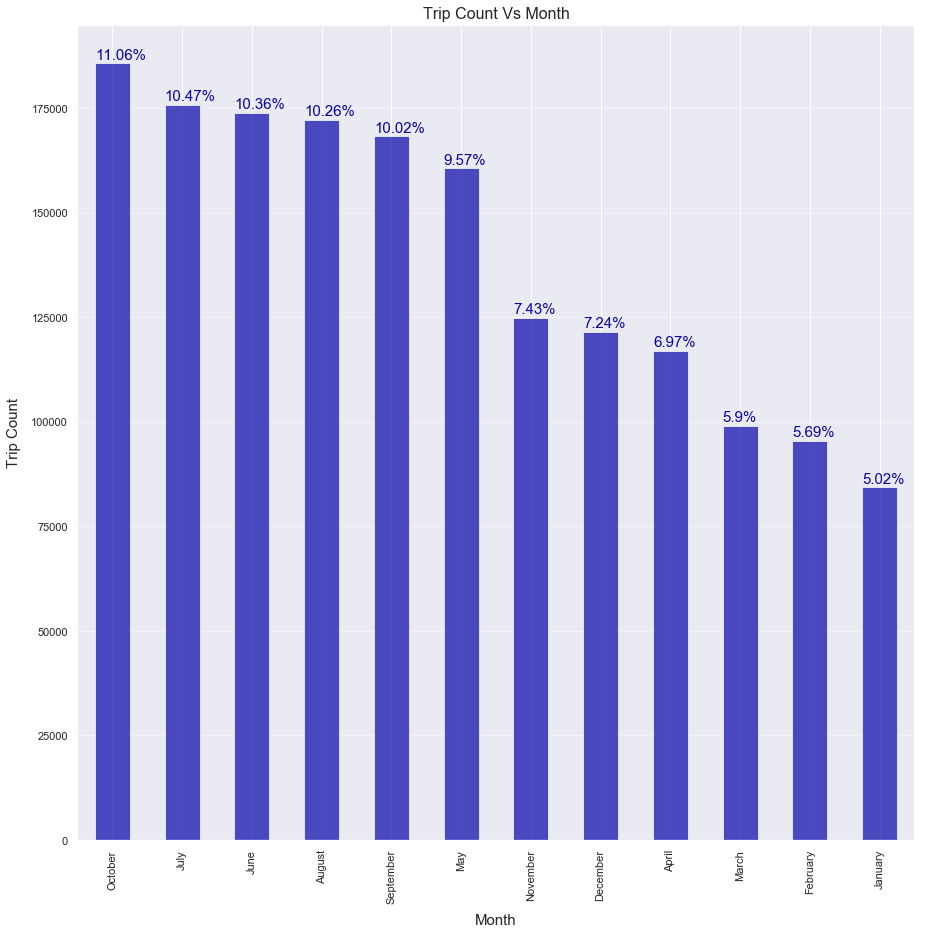

In [63]:
# A bar Chart Plot to see monthwise trip counts
plt.figure(figsize=(15,15))
ax=gobike['month'].value_counts().plot(kind='bar',color='#0504aa',alpha=0.7);
t=[]
for i in ax.patches:
    t.append(i.get_height())
t=sum(t)
for i in ax.patches:
    ax.text(i.get_x(),i.get_height()+1000,str(round((i.get_height()/t)*100,2))+'%',color='#0504aa',fontsize=15)
plt.grid(axis="y",alpha=0.50)
plt.xlabel('Month',fontsize=15,labelpad=10)
plt.ylabel('Trip Count',fontsize=15,labelpad=10)
plt.title("Trip Count Vs Month",fontsize=16);

> By above frequency graph, October is the pick of the month (~11% share) and January is the lowest(~5% share). Further analysis based on categorical varible Gender, Age Group, User Type and Time of the day would be intriguing.

### 6. How is distribution of trips by consumer and customer?

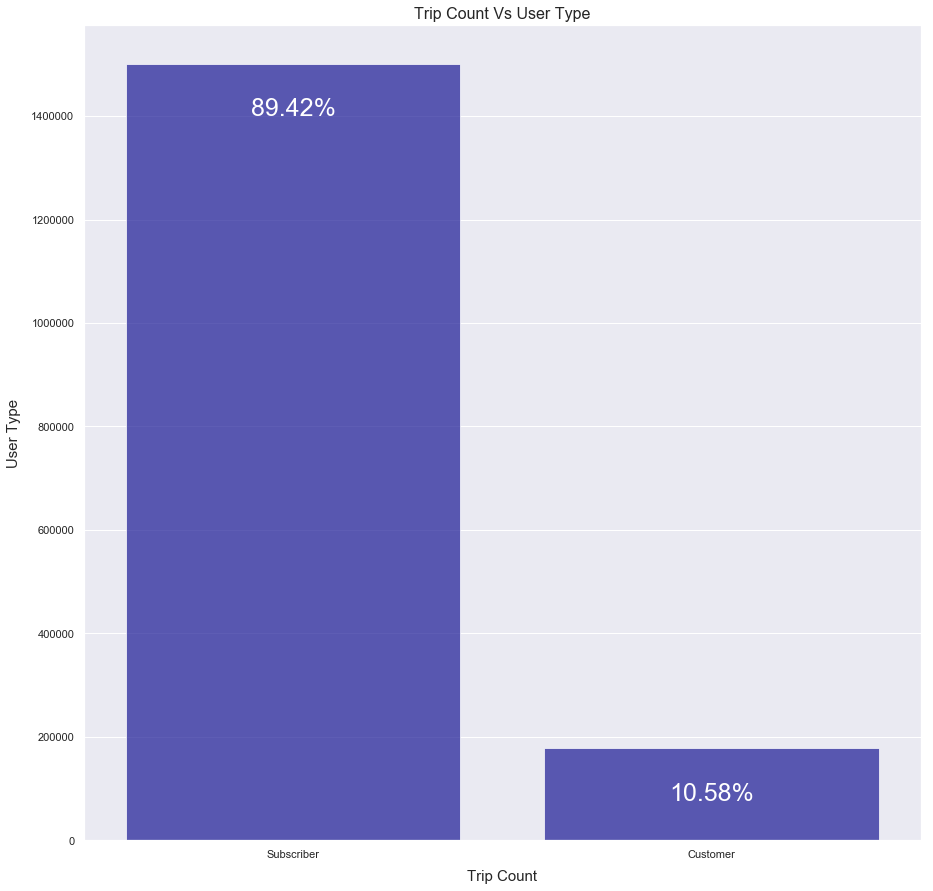

In [64]:
plt.figure(figsize=(15,15))
ax=sb.countplot(data=gobike,x='user_type',color='#0504aa',alpha=0.7);
t=[]
for i in ax.patches:
    t.append(i.get_height())
t=sum(t)
for i in ax.patches:
    ax.text(i.get_x()+.3,i.get_height()-100000,str(round((i.get_height()/t)*100,2))+'%',color='white',fontsize=25)
plt.xlabel("Trip Count",fontsize=15,labelpad=10)
plt.ylabel("User Type",fontsize=15,labelpad=10)
plt.title("Trip Count Vs User Type",fontsize=16);

> Out of total GoBike share rides ~ 89% is Subscriber and rest ~11% is customer. This signifies that most people are using bike sharing system on regular basis and only few are those taken it occassionaly.  

### 7. Gender Wise Distribution

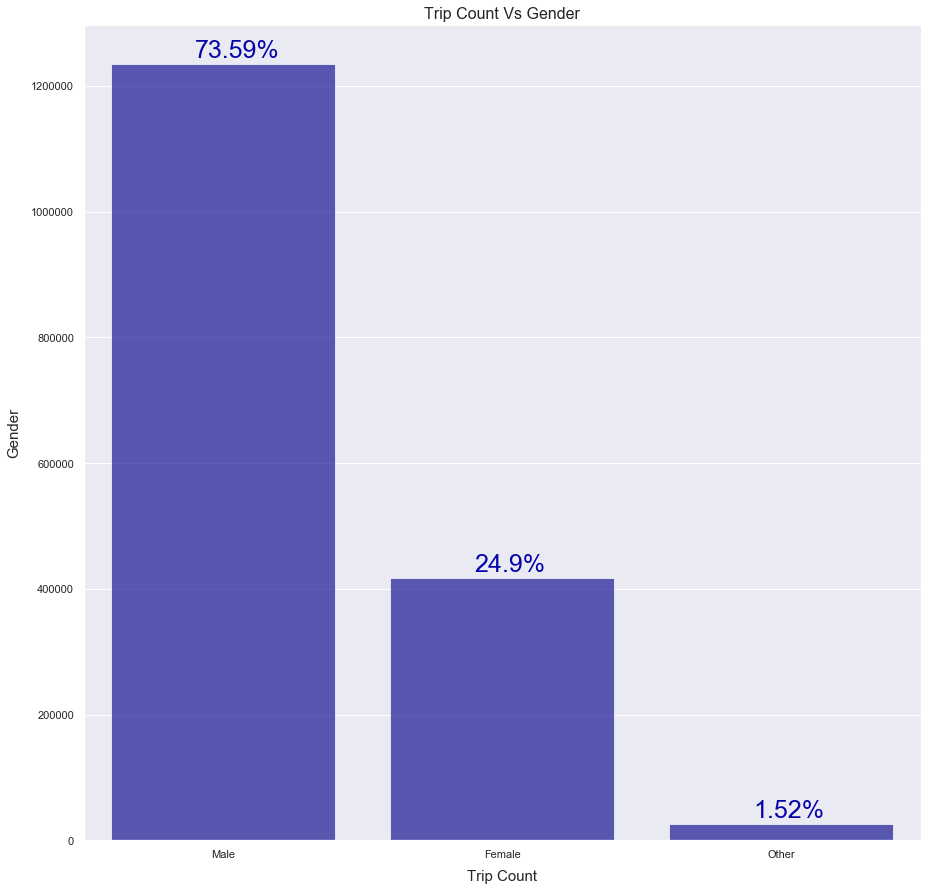

In [65]:
plt.figure(figsize=(15,15))
ax=sb.countplot(data=gobike,x='member_gender',color='#0504aa',alpha=0.7);
t=[]
for i in ax.patches:
    t.append(i.get_height())
t=sum(t)
for i in ax.patches:
    ax.text(i.get_x()+.3,i.get_height()+10000,str(round((i.get_height()/t)*100,2))+'%',color='#0504aa',fontsize=25)
plt.xlabel("Trip Count",fontsize=15,labelpad=10)
plt.ylabel("Gender",fontsize=15,labelpad=10)
plt.title("Trip Count Vs Gender",fontsize=16);

> Out of total bike share trip ~73% are male, ~25% are female and rest ~2% are others.  

### 8. What is Bike Trip pattern on weekdays and weekends?

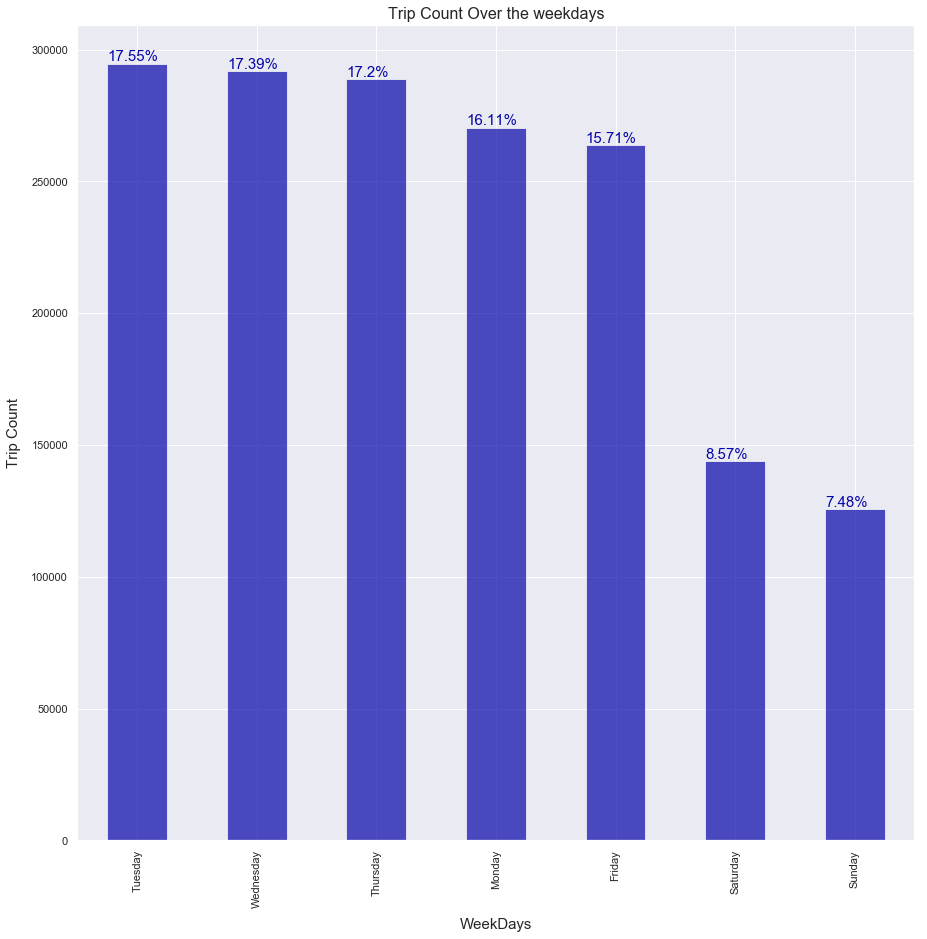

In [66]:
plt.figure(figsize=(15,15))
ax=gobike['weekday'].value_counts().plot(kind='bar',color='#0504aa',alpha=0.7);
t=[]
for i in ax.patches:
    t.append(i.get_height())
t=sum(t)
for i in ax.patches:
    ax.text(i.get_x(),i.get_height()+1000,str(round((i.get_height()/t)*100,2))+'%',color='#0504aa',fontsize=15)
plt.xlabel('WeekDays',fontsize=15,labelpad=10)
plt.ylabel('Trip Count',fontsize=15,labelpad=10)
plt.title("Trip Count Over the weekdays",fontsize=16);

> There are less number of rides on weekends(~16%) in comparison to weekdays(~84%). In succession of this, looking into which period of the day is more preferable for the ride would be a good idea.

### 9. Which trips are most popular?

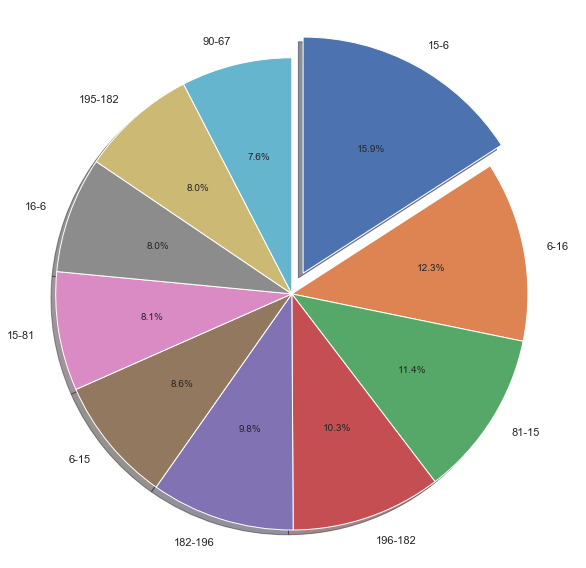

In [68]:
#Plotting a Pie Chart to see the trends
pie_data1=gobike.tripid.value_counts().nlargest(10)
explode = (0.1, 0, 0, 0,0, 0, 0, 0,0,0)
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6', '#ff6666','#ffb555', '#c2c678','#ff8888']
fig,ax=plt.subplots(figsize=(10,8))
ax.pie(pie_data1,explode=explode,autopct='%1.1f%%',labels=pie_data1.index,startangle=90,counterclock=False,shadow=True);
ax.axis('square')
plt.tight_layout()

In [69]:
start=gobike.query('tripid=="15-6"').start_station_name.iloc[0]

In [70]:
end=gobike.query('tripid=="15-6"').end_station_name.iloc[0]

In [71]:
print("The most popular trip is :"+start+" To "+end)

The most popular trip is :San Francisco Ferry Building (Harry Bridges Plaza) To The Embarcadero at Sansome St


> The above plot shows the most popular trip as '15-6' i.e San Francisco Ferry Building (Harry Bridges Plaza) To The Embarcadero at Sansome St

### 10. Which one is the most busiest station?

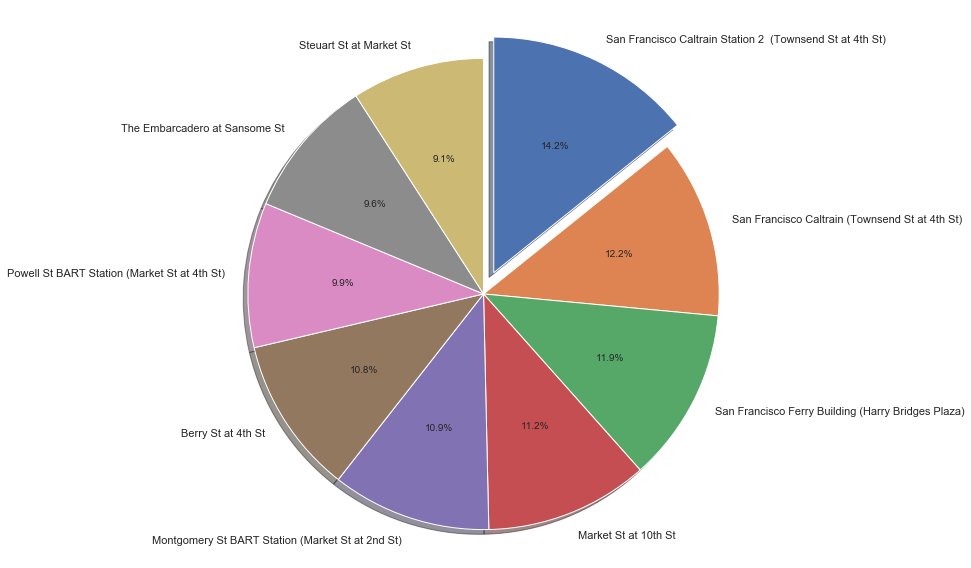

In [74]:
#Plotting a Pie Chart to see the trends
pie_data2=(gobike.start_station_name.value_counts().nlargest(10)+\
          gobike.end_station_name.value_counts().nlargest(10)).nlargest(10)
explode = (0.1, 0, 0, 0,0, 0, 0, 0,0)
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6', '#ff6666','#ffb555', '#c2c678','#ff8888']
fig,ax=plt.subplots(figsize=(10,8))
ax.pie(pie_data2,explode=explode,autopct='%1.1f%%',labels=pie_data2.index,startangle=90,\
          counterclock=False,shadow=True)#,colors='rainbow');
ax.axis('square')
plt.tight_layout()
#plt.savefig('busiest_station.png')

> Above Plot Shows "San Francisco Caltrain Station 2(Townsend St at 4th St)" is the Busiest one.The analysis is based on the most number of incoming and outgoing ride from a station. Further analysis of rides from or to 'San Francisco Caltrain Station 2(Townsend St at 4th St)' would be interesting.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> During univariate exploratory analysis I found unsusual points in distributions of some of the key variables of the dataset e.g 'duration_sec', 'member_birth_year' etc. I used histogram plot of these variables to have a quick glance on distribution and found that presence of outliers is making the plot skewed. I needed to fix this ouliers issue before proceeding with the analysis. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I drawn a histogram to see the distribution of variable 'duration_sec'. The plot clearly indicates presence of some outliers which I needed to fix before further analysis.I deleted the rows that contains outliers. I also find unusualpoints with variable 'member_birth_year'. The histogram plot shows presence of some outliers. After further expolration found that some rider's age is more than 70 years and in some cases more that 100 years which is not reasonable. Hence, I deleted the rows with age more than 70 years.

## Bivariate Exploration

### 1. Pattern of Bike share trip based on time of the day.

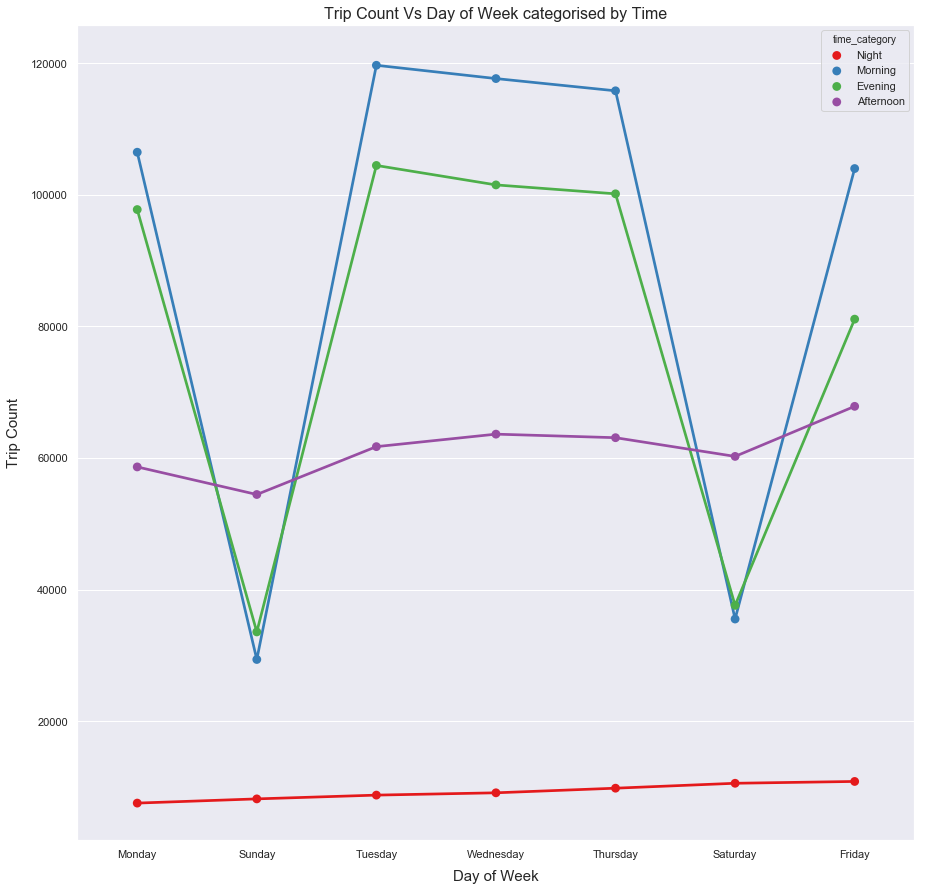

In [75]:
#Summarize data by weekday and time category
time_weekday_df=gobike.groupby(['weekday', 'time_category']).agg({'duration_sec':'count'}).reset_index();
time_weekday_df.sort_values('duration_sec',inplace=True)
plt.figure(figsize=(15,15))
sb.pointplot(x='weekday',y='duration_sec',hue='time_category',data=time_weekday_df,palette='Set1');
plt.xlabel("Day of Week",fontsize=15,labelpad=10)
plt.ylabel("Trip Count",fontsize=15,labelpad=10)
plt.title("Trip Count Vs Day of Week categorised by Time",fontsize=16);

> By Inspecting the above Plot, It is evident that except weekends most rides were taken in the Morning. On weekends, most rides were taken in Afternoon.Rides taken in the Night is almost constant over the weekdays.    

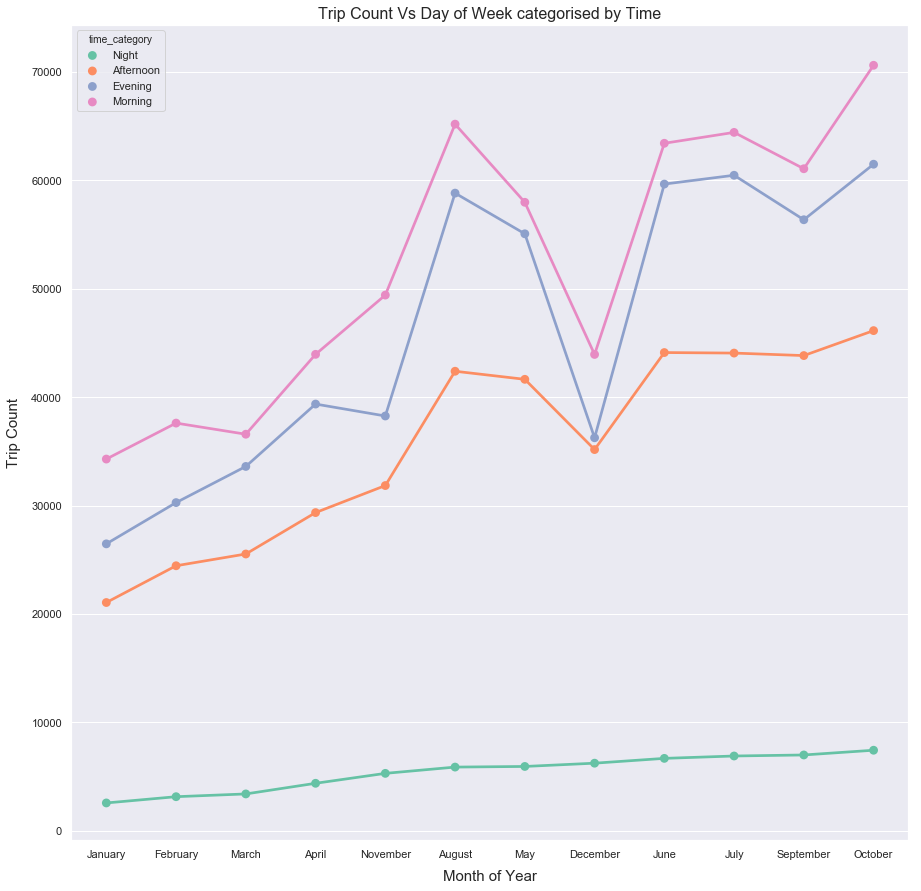

In [76]:
time_month_df=gobike.groupby(['month', 'time_category']).agg({'duration_sec':'count'}).reset_index();
time_month_df.sort_values('duration_sec',inplace=True)
plt.figure(figsize=(15,15))
sb.pointplot(x='month',y='duration_sec',hue='time_category',data=time_month_df,palette='Set2');
plt.xlabel("Month of Year",fontsize=15,labelpad=10)
plt.ylabel("Trip Count",fontsize=15,labelpad=10)
plt.title("Trip Count Vs Day of Week categorised by Time",fontsize=16);

> Morning trip is preferred one over the year. Followed by evening trip.

### 2.Relationship between Distance travelled and age group

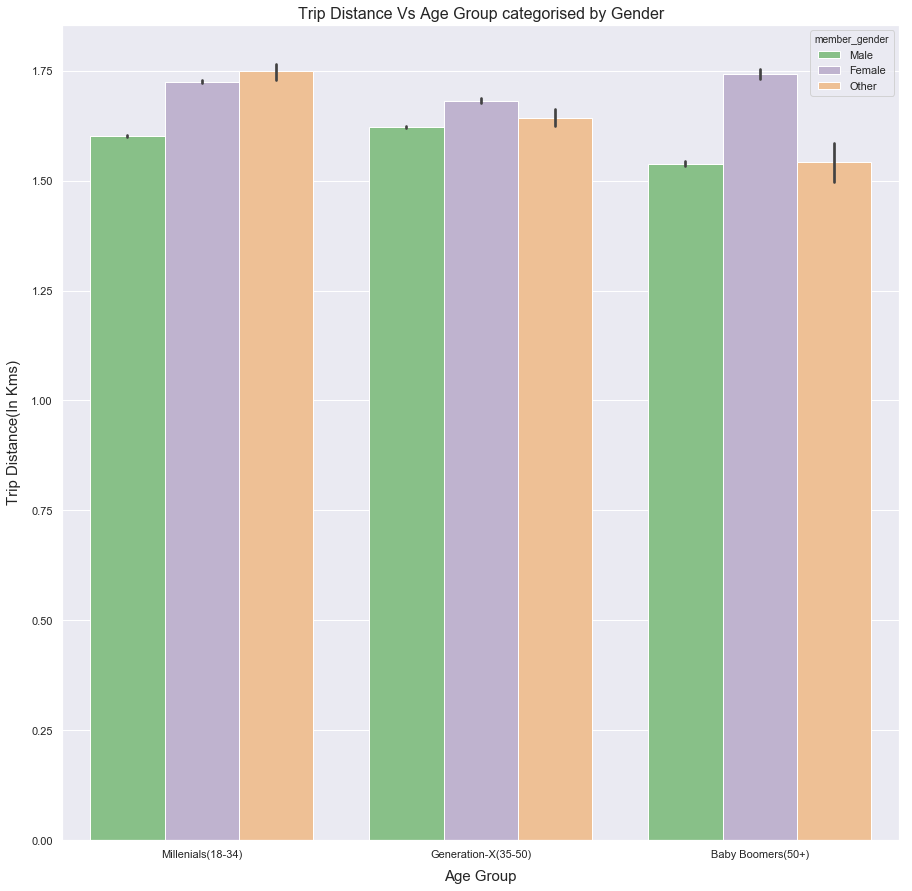

In [82]:
plt.figure(figsize=(15,15))
#age_gender_df=gobike.groupby(['age_group', 'member_gender']).agg({'distance_km':'sum'}).reset_index();
sb.barplot(x='age_group',y='distance_km',hue='member_gender',data=gobike,palette='Accent');
plt.xlabel("Age Group",fontsize=15,labelpad=10)
plt.ylabel("Trip Distance(In Kms)",fontsize=15,labelpad=10)
plt.title("Trip Distance Vs Age Group categorised by Gender",fontsize=16);

> Male are leading in long distance trip and among them millenials.

### 3. Pattern of Bike share trip based on age group.

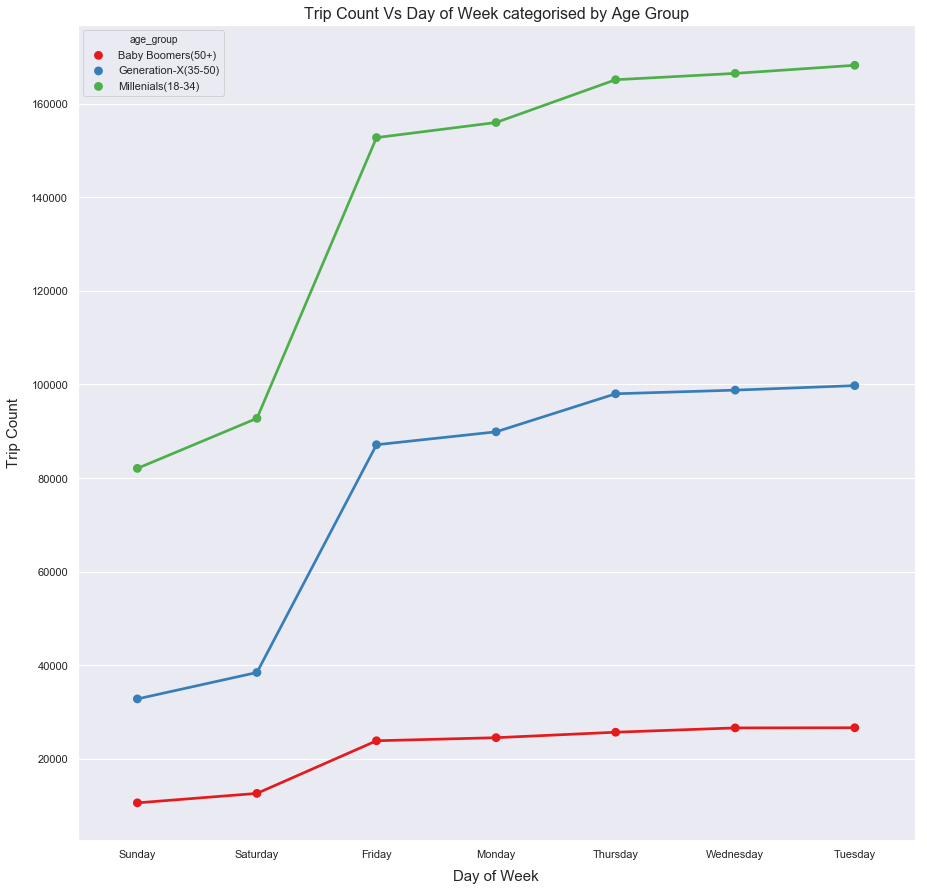

In [75]:
#Summarize data by weekday and Age Group
age_weekday_df=gobike.groupby(['weekday', 'age_group']).agg({'duration_sec':'count'}).reset_index();
plt.figure(figsize=(15,15))
age_weekday_df.sort_values('duration_sec',inplace=True)
sb.pointplot(x='weekday',y='duration_sec',hue='age_group',data=age_weekday_df,palette='Set1');
plt.xlabel("Day of Week",fontsize=15,labelpad=10)
plt.ylabel("Trip Count",fontsize=15,labelpad=10)
plt.title("Trip Count Vs Day of Week categorised by Age Group",fontsize=16);

> Millenials are the most frequent rider in Ford GoBike sharing system followed by Gen-X.

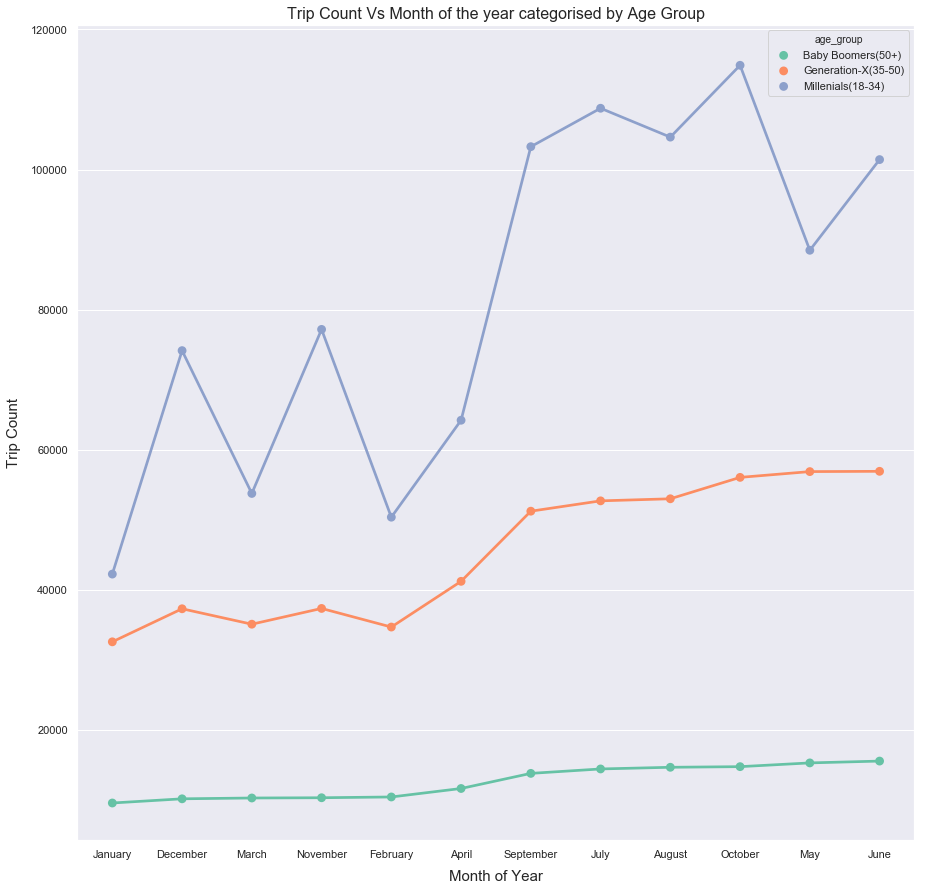

In [76]:
#Summarize data by month and Age Group
age_month_df=gobike.groupby(['month', 'age_group']).agg({'duration_sec':'count'}).reset_index();
age_month_df.sort_values('duration_sec',inplace=True)
plt.figure(figsize=(15,15))
sb.pointplot(x='month',y='duration_sec',hue='age_group',data=age_month_df,palette='Set2');
plt.xlabel("Month of Year",fontsize=15,labelpad=10)
plt.ylabel("Trip Count",fontsize=15,labelpad=10)
plt.title("Trip Count Vs Month of the year categorised by Age Group",fontsize=16);

>  Millenials are the most frequent rider in Ford GoBike sharing system followed by Gen-X.

### 4. What is the Monthwise Trends of the Trips from the point of view of user type?

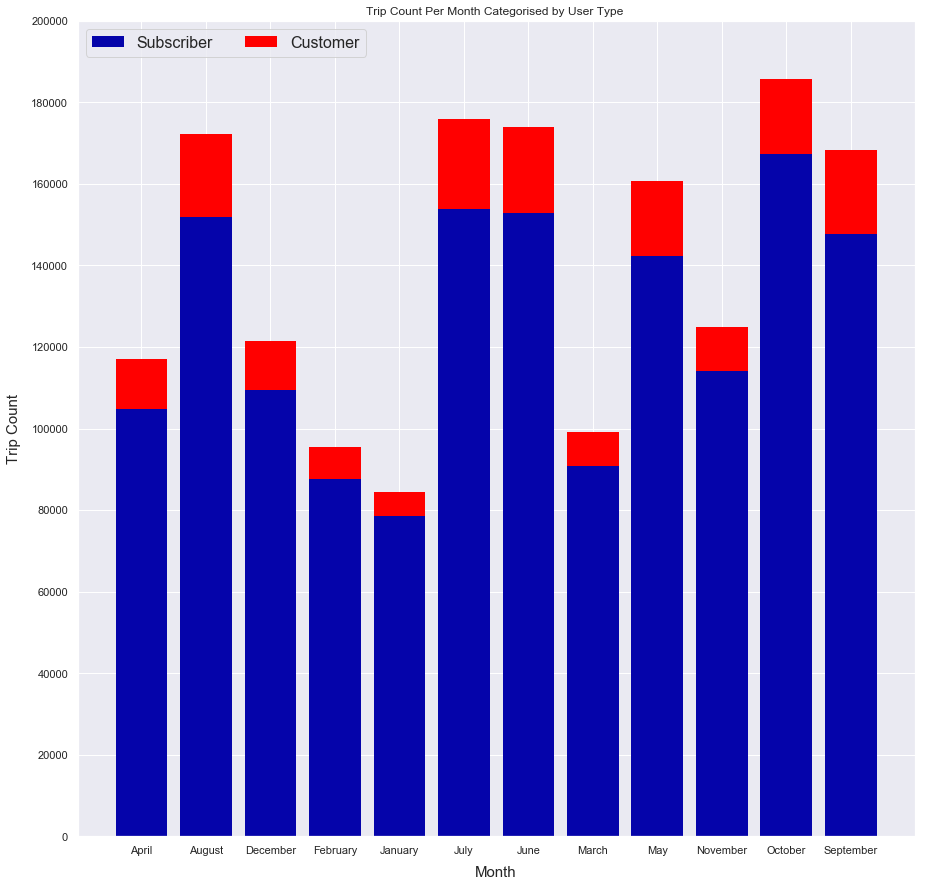

In [77]:
plt.figure(figsize=(15,15))
customer_df=gobike.query('user_type=="Customer"').month.value_counts()
subscriber_df=gobike.query('user_type=="Subscriber"').month.value_counts()
customer_df.sort_index(inplace=True)
subscriber_df.sort_index(inplace=True)
weekday=customer_df.index
p1=plt.bar(weekday,subscriber_df,color = "#0504aa",edgecolor='none');
p2=plt.bar(weekday,customer_df,bottom=subscriber_df,color="red",edgecolor='none');
topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0504aa',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Subscriber', 'Customer'], loc="upper left", ncol = 2, prop={'size':16})
plt.xlabel('Month',labelpad=10,fontsize=15)
plt.ylabel('Trip Count',labelpad=10,fontsize=15)
plt.title('Trip Count Per Month Categorised by User Type ')
plt.yticks(np.arange(0, customer_df.max()+subscriber_df.max()+20000, 20000));

> A monthwise analysis of year 2018 data shows 'October' month had highest trip frequency followed by June, July, August and September.From the perspective of user type 'Customer' type has quite low share compare to 'Subscriber' over the month.

### 5. What is the Monthwise Trends of the Trips from the point of view of Gender?

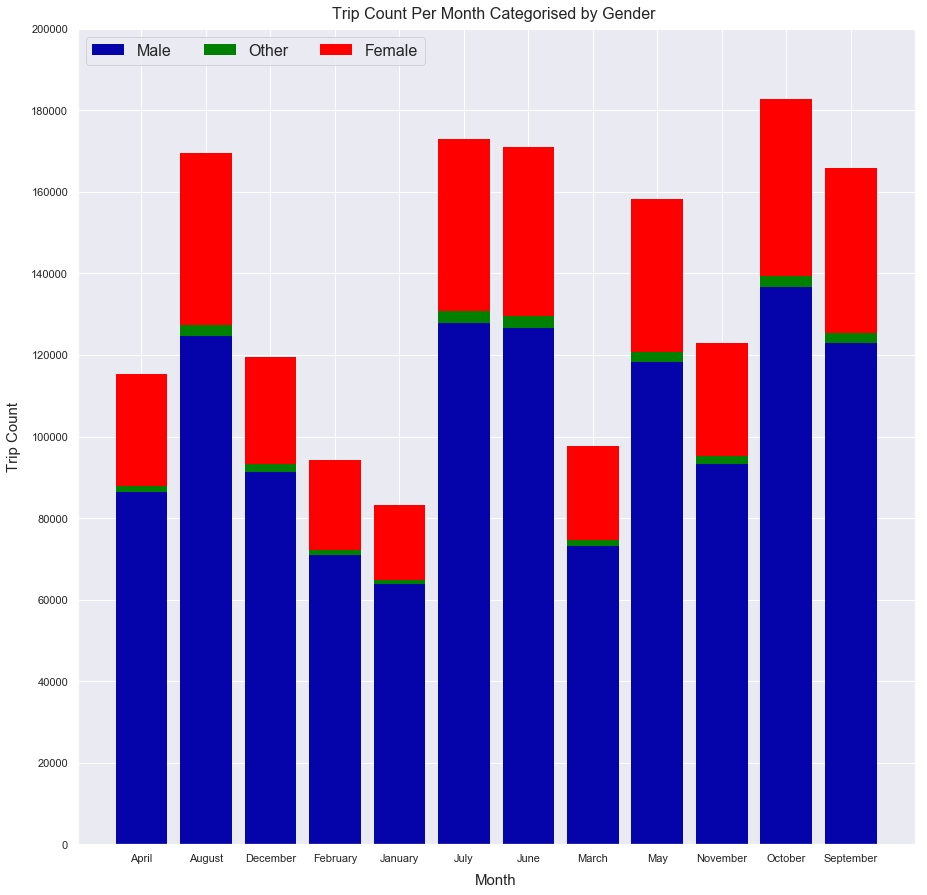

In [78]:
plt.figure(figsize=(15,15))
male_df=gobike.query('member_gender=="Male"').month.value_counts()
female_df=gobike.query('member_gender=="Female"').month.value_counts()
other_df=gobike.query('member_gender=="Other"').month.value_counts()
male_df.sort_index(inplace=True)
female_df.sort_index(inplace=True)
other_df.sort_index(inplace=True)
weekday=male_df.index
p1=plt.bar(weekday,male_df,color = "#0504aa",edgecolor='none');
p2=plt.bar(weekday,female_df,bottom=male_df,color="red",edgecolor='none');
p3=plt.bar(weekday,other_df,bottom=male_df,color="green",edgecolor='none');
topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
middlebar = plt.Rectangle((0,0),1,1,fc='green',  edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0504aa',  edgecolor = 'none')
l = plt.legend([bottombar,middlebar, topbar], ['Male', 'Other','Female'], loc="upper left", ncol = 3, prop={'size':16})
plt.xlabel('Month',labelpad=10,fontsize=15)
plt.ylabel('Trip Count',labelpad=10,fontsize=15)
plt.title('Trip Count Per Month Categorised by Gender ',pad=10,fontsize=16)
plt.yticks(np.arange(0, male_df.max()+female_df.max()+other_df.max()+20000, 20000));

> Segregeting monthwise trip frequency based on gender category shows 'Male' had most of the share.'Other' had a very marginal share compared to others.

### 6. What is the Daywise trends from the point of view of User Type ?

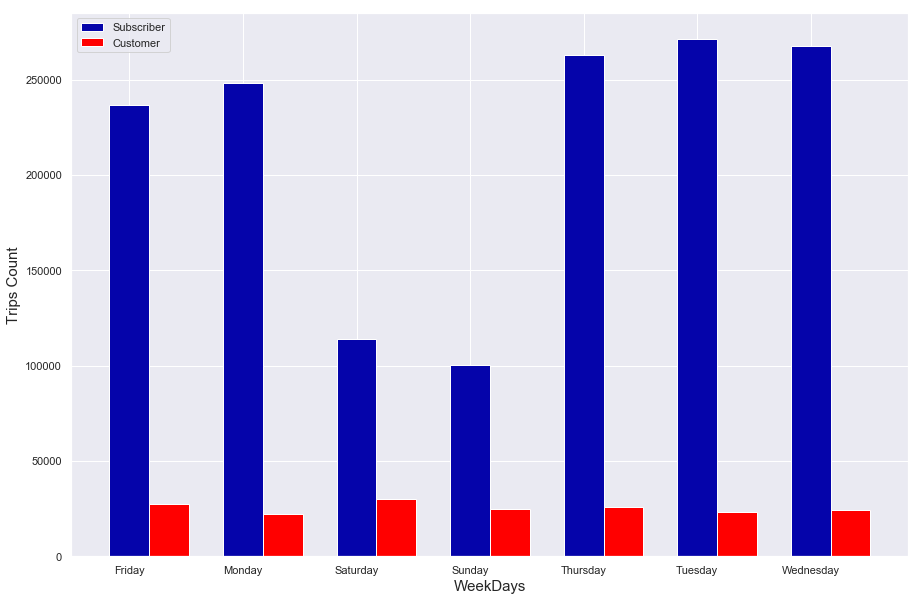

In [79]:
plt.figure(figsize=(15,10))
customer_df=gobike.query('user_type=="Customer"').weekday.value_counts()
subscriber_df=gobike.query('user_type=="Subscriber"').weekday.value_counts()
customer_df.sort_index(inplace=True)
subscriber_df.sort_index(inplace=True)
weekday=subscriber_df.index
pos=np.arange(len(weekday))
bar_width=0.35
userType=['Subscriber','Customer']
p1=plt.bar(pos,subscriber_df,color="#0504aa",width=bar_width);
p2=plt.bar(pos+bar_width,customer_df,width=bar_width,color="red");
#plt.bar(df1.index,df1,color='#0504aa',alpha=0.7,bar_width)
plt.xticks(pos,weekday)
plt.xlabel('WeekDays',fontsize=15)
plt.ylabel('Trips Count',fontsize=15)
plt.legend(userType,loc=2);

> At more granular level, seeing daywise trends trip frequency is more on weekdays in comparision to weekends.Further 'Customer' had small share compared to 'Subscriber'.

### 7. What is the Daywise trends from the point of view of Gender ?

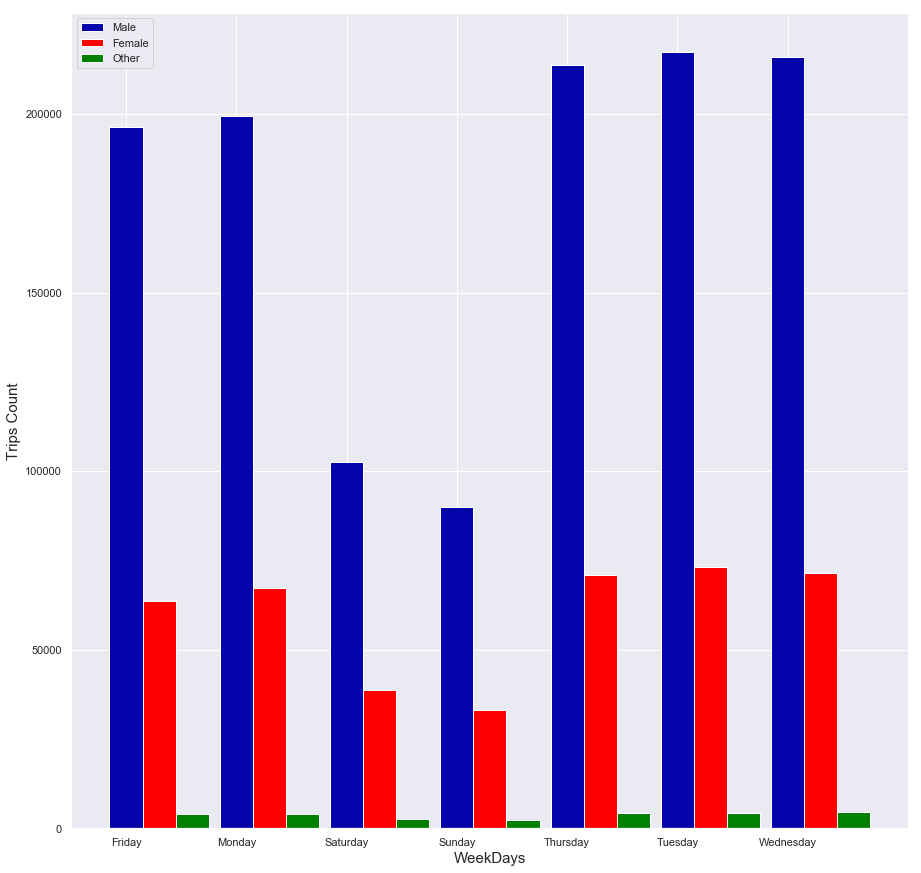

In [80]:
plt.figure(figsize=(15,15))
male_df=gobike.query('member_gender=="Male"').weekday.value_counts()
female_df=gobike.query('member_gender=="Female"').weekday.value_counts()
other_df=gobike.query('member_gender=="Other"').weekday.value_counts()
male_df.sort_index(inplace=True)
female_df.sort_index(inplace=True)
other_df.sort_index(inplace=True)
weekday=subscriber_df.index
pos=np.arange(len(weekday))
bar_width=0.30
userType=['Male','Female','Other']
p1=plt.bar(pos,male_df,color="#0504aa",width=bar_width);
p2=plt.bar(pos+bar_width,female_df,width=bar_width,color="red");
p2=plt.bar(pos+2*bar_width,other_df,width=bar_width,color="green");
#plt.bar(df1.index,df1,color='#0504aa',alpha=0.7,bar_width)
plt.xticks(pos,weekday)
plt.xlabel('WeekDays',fontsize=15)
plt.ylabel('Trips Count',fontsize=15)
plt.legend(userType,loc=2);

> A similar trend as monthwise can be seen in daywise comparison also.

### 8. Is there any relation between Trip Duration and Trip Distance ?

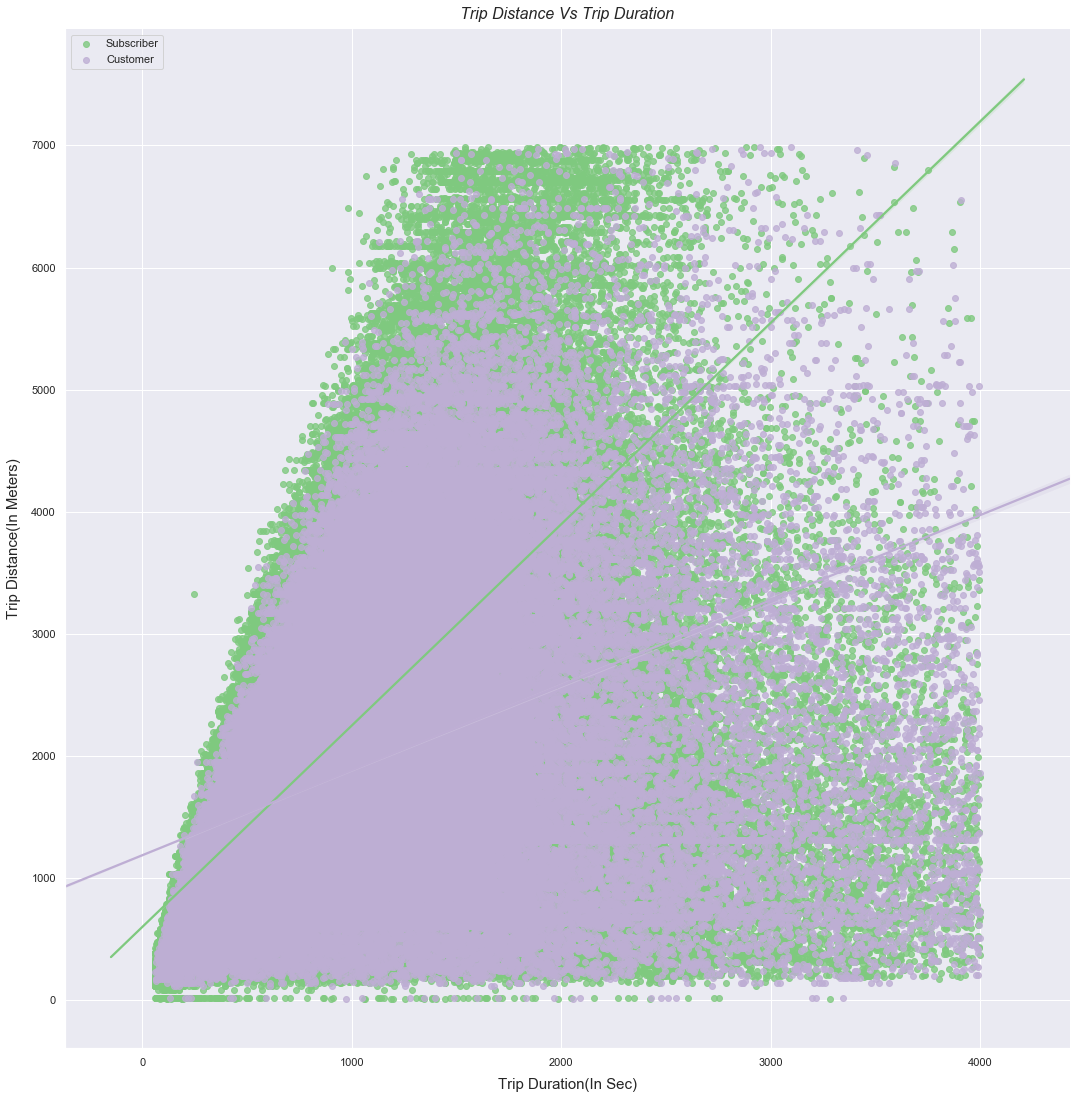

In [91]:
gobike['distance_m']=gobike['distance_km']*1000
sb.lmplot(x='duration_sec',y='distance_m',hue='user_type',size=15,data=gobike,palette='Accent',legend=False);
plt.xlabel("Trip Duration(In Sec)",fontsize=15,labelpad=10);
plt.ylabel("Trip Distance(In Meters)",fontsize=15,labelpad=10);
plt.title("Trip Distance Vs Trip Duration",fontsize=16,loc='center',pad=10.0,style='italic');
plt.legend(loc=2);

>There is a linear relation with positive slope between trip distance and trip duration as shown by regression line. This means for majority of trips, which are of longer distance more time is taken.This also shows the the distance calculated using latitude and longitude is quite reaosnable.However, for same distance customers have taken longer trip time compared to Subscribers. One possible reason might be that Customers are using this explore the city rather than for daily works.A possbile further analysis would be to see effect of categorical variable(Gender, Age, Time, User Type) on this relation.

### 9. How is the relation of Trip Duration to categorical variable (Age, Gender, Time Category)?

#### A. Trip Duration Vs Gender

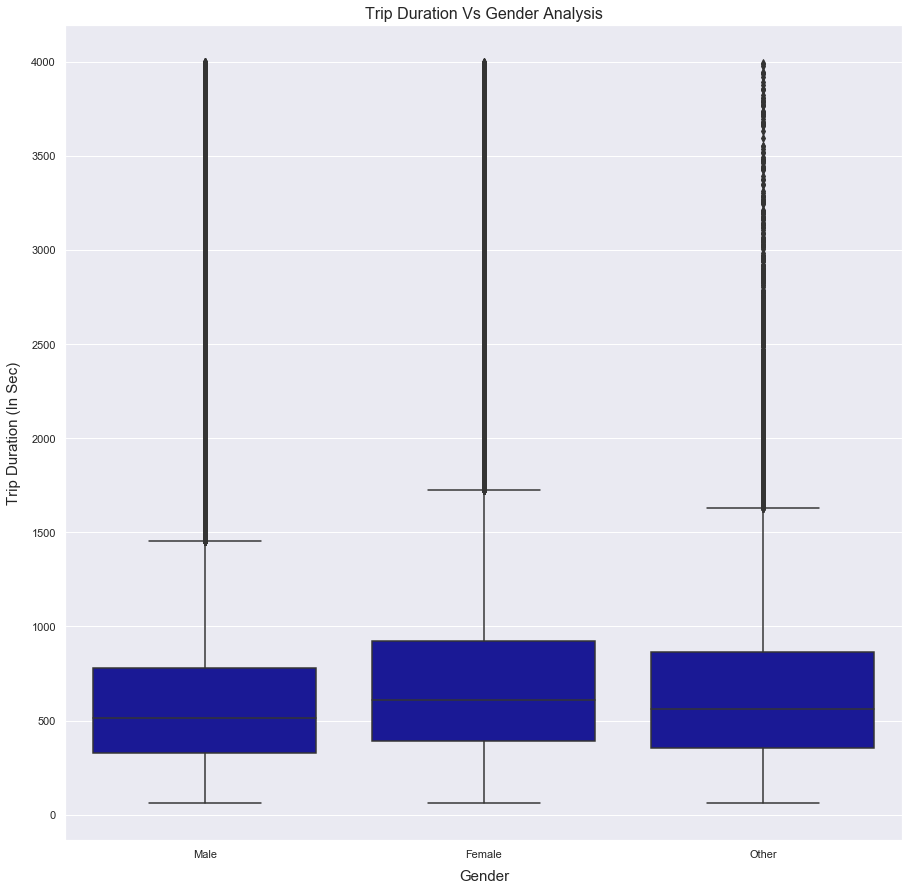

In [82]:
#Box plot
plt.figure(figsize=(15,15))
sb.boxplot(data=gobike,y='duration_sec',x='member_gender',color='#0504aa');
plt.xlabel("Gender",fontsize=15,labelpad=10)
plt.ylabel("Trip Duration (In Sec)",fontsize=15,labelpad=10)
plt.title("Trip Duration Vs Gender Analysis",fontsize=16);

> Female Riders are taken trips of longer duration, followed by other category. Male Riders have taken comparatively less duration trips. A further correlation analysis between these from different perspective would be interesting.

#### B.Trip Duration Vs Time Category

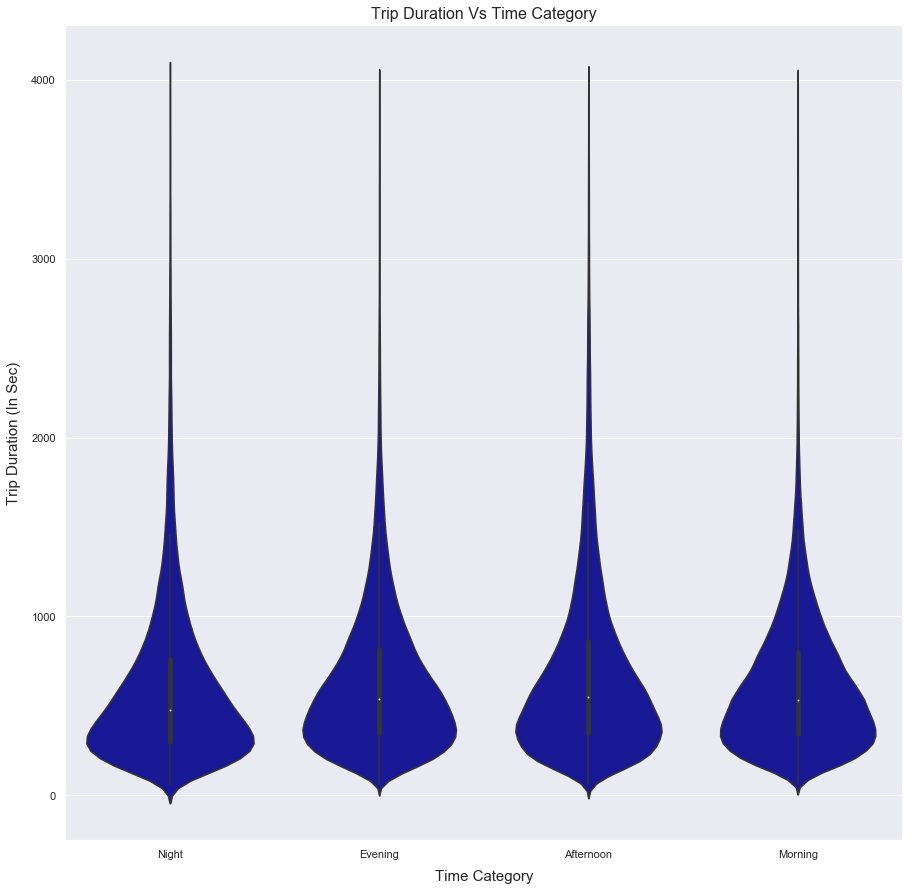

In [117]:
#Violin Plot
plt.figure(figsize=(15,15))
sb.violinplot(data=gobike,y='duration_sec',x='time_category',color='#0504aa');
plt.xlabel("Time Category",fontsize=15,labelpad=10)
plt.ylabel("Trip Duration (In Sec)",fontsize=15,labelpad=10)
plt.title("Trip Duration Vs Time Category",fontsize=16);

> Morning rides are having more trip duration time. 

#### C.Trip Duration Vs User Type

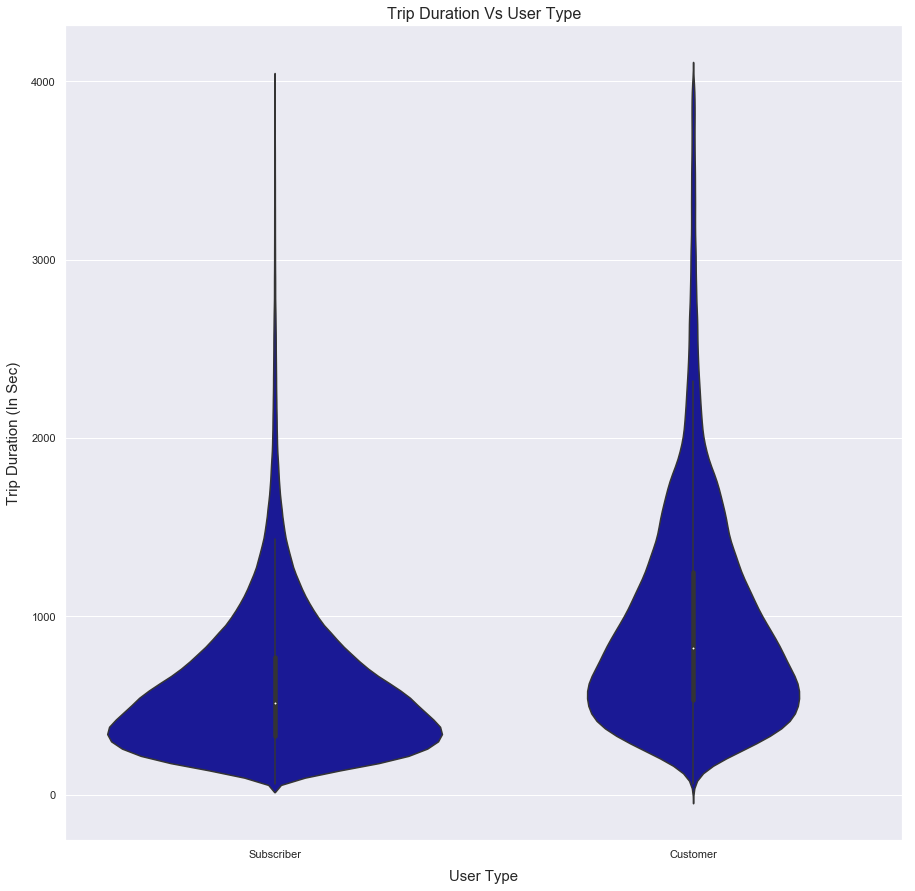

In [118]:
#violin plot
plt.figure(figsize=(15,15))
sb.violinplot(data=gobike,y='duration_sec',x='user_type',color='#0504aa');
plt.xlabel("User Type",fontsize=15,labelpad=10)
plt.ylabel("Trip Duration (In Sec)",fontsize=15,labelpad=10)
plt.title("Trip Duration Vs User Type",fontsize=16);

> Customers trip duration time is more than Subscribers.

### 10.Weekday vs Time Category

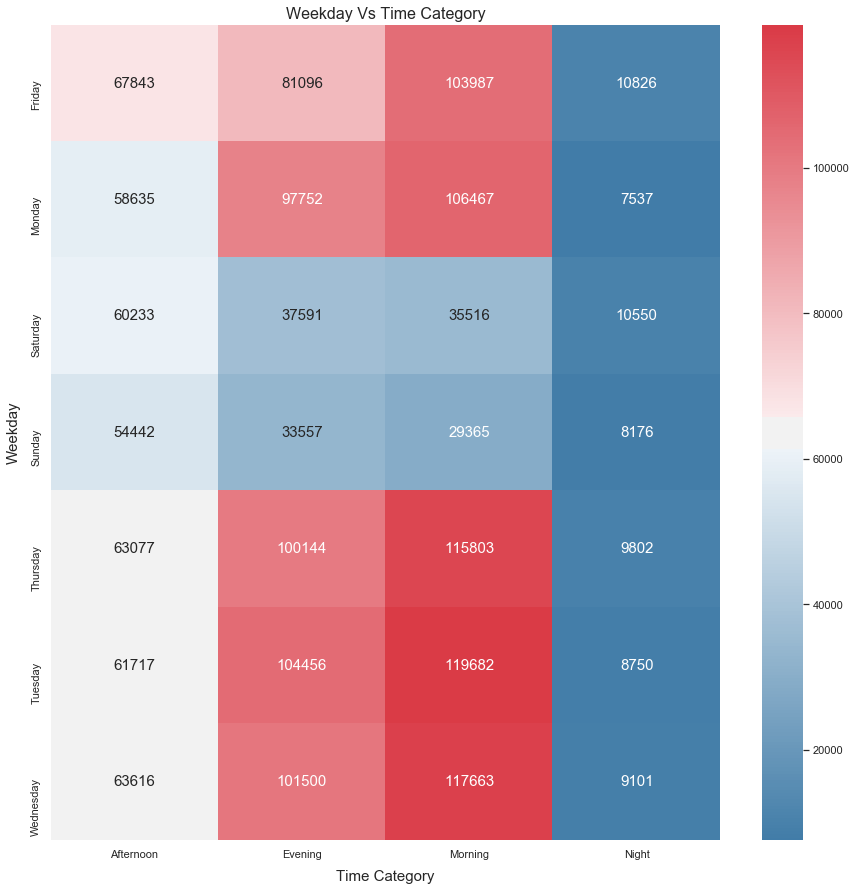

In [85]:
plt.figure(figsize=(15,15))
gobike_pivot1=pd.pivot_table(gobike,index='weekday',columns='time_category',values='bike_id',aggfunc='count');
cmap = sb.diverging_palette(240, 10, as_cmap=True);
sb.heatmap(gobike_pivot1,annot=True,cmap=cmap,fmt='.0f',annot_kws={'size':15});
plt.xlabel("Time Category",fontsize=15,labelpad=10)
plt.ylabel("Weekday",fontsize=15,labelpad=10)
plt.title("Weekday Vs Time Category",fontsize=16);
#sb.axes_style()

> This Heatmap shows two facts clearly: 1. Weekadays have more trips than weekends. 2. A particular day morning and evening are busy hours except sunday and saturday.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I did bivariate analysis of categorial and numerical using various plotting techniques. Following are key findings:
1. Weekadays have more trips than weekends.
2. A particular day morning and evening are busy hours except sunday and saturday.
3. Male are leading in long distance trip and among them millenials.
4. Millenials(18-34) are the most frequent rider in Ford GoBike sharing system.
5. Morning rides are having more trip duration time.
6. User type 'Customer' type has quite low share compare to 'Subscriber'.
7. Segregeting monthwise trip frequency based on gender category shows 'Male' had most of the share.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> 
1. Female Riders are taken trips of longer duration, followed by other category. Male Riders have taken comparatively less duration trips. A further correlation analysis between these from different perspective would be interesting.
2. There is clear cut linear relation between trip distance and  Trip duration for most density of trips which lies between 0 to 1500 Sec.Above this trip duration time Plot does not give any clear cut idea. As we can see, same distance travelled for longer trip duration. One reason might be the assumption of distance calculation is not correct. What I have calculated is direct distance between the two stations. However, during a trip rider is free to roam around the locality then can end the journey by depositing the bike at nearest Station.A possbile further analysis would be to see effect of categorical variable(Gender, Age, Time, User Type) on this relation.

## Multivariate Exploration

### 1. How user type relate with most frequent trip taken or prefered based on time and variation with Gender?

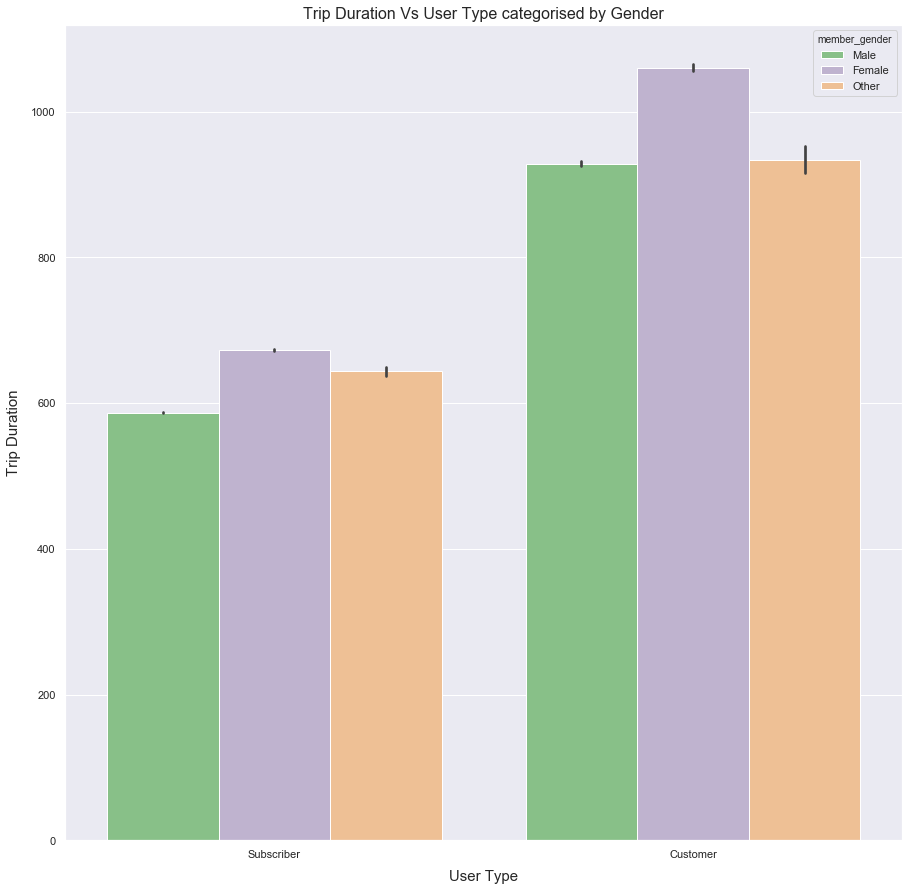

In [80]:
plt.figure(figsize=(15,15))
sb.barplot(x='user_type',y='duration_sec',hue='member_gender',data=gobike,palette='Accent');
plt.xlabel("User Type",fontsize=15,labelpad=10)
plt.ylabel("Trip Duration",fontsize=15,labelpad=10)
plt.title("Trip Duration Vs User Type categorised by Gender",fontsize=16);

> Interestingly, customers have ride for longer trip duration compared to subscriber. This indicates an important fact that subscriber generally have taken ride for their daily work like office or school. Customers are not regular but they might have taken ride to roam around city to explore it. Female  customers or subscribers have taken longer trip time.

### 2. how is response of the program Bike share for All?

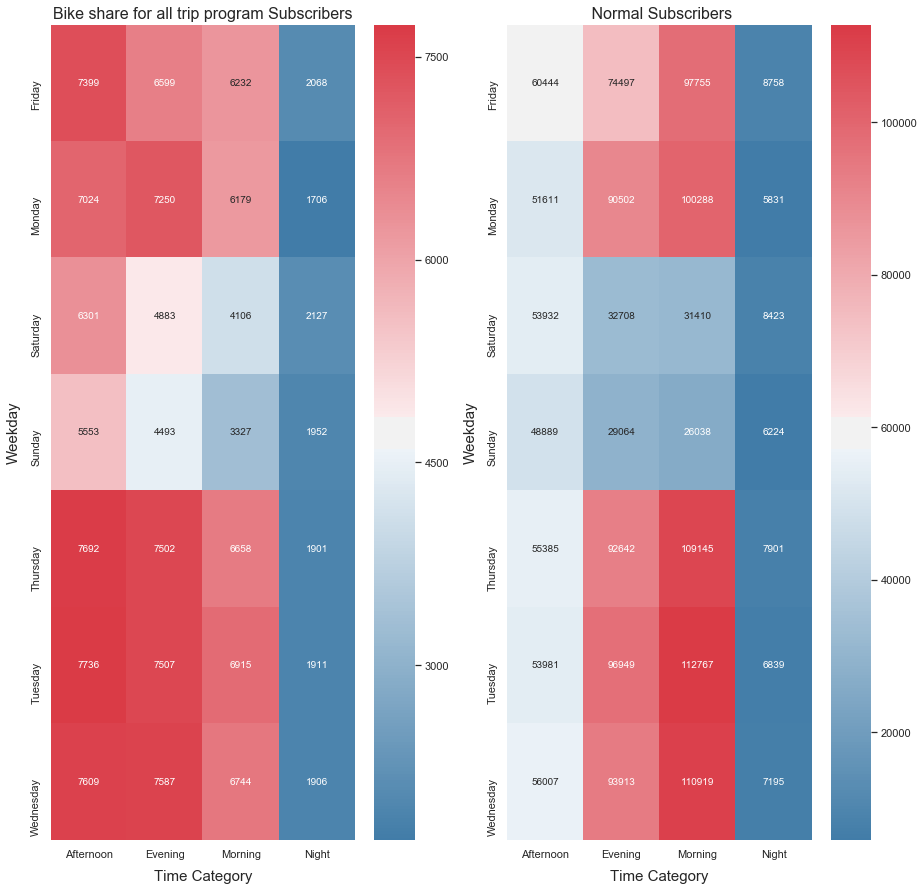

In [87]:
plt.figure(figsize=(15,15))
gobike_yes=gobike.query('bike_share_for_all_trip=="Yes"')
gobike_no=gobike.query('bike_share_for_all_trip=="No"')
pivot_yes=pd.pivot_table(gobike_yes,index='weekday',columns='time_category',values='bike_id',aggfunc='count');
pivot_no=pd.pivot_table(gobike_no,index='weekday',columns='time_category',values='bike_id',aggfunc='count');
cmap = sb.diverging_palette(240, 10, as_cmap=True);
plt.subplot(121)                       
sb.heatmap(pivot_yes,annot=True,cmap=cmap,fmt='.0f',annot_kws={'size':10});
plt.xlabel("Time Category",fontsize=15,labelpad=10)
plt.ylabel("Weekday",fontsize=15,labelpad=10)
plt.title("Bike share for all trip program Subscribers",fontsize=16);
plt.subplot(122)  
sb.heatmap(pivot_no,annot=True,cmap=cmap,fmt='.0f',annot_kws={'size':10});
plt.xlabel("Time Category",fontsize=15,labelpad=10)
plt.ylabel("Weekday",fontsize=15,labelpad=10)
plt.title(" Normal Subscribers",fontsize=16,loc='center');

#### What is bike share for all trip?
>Bike share for All is an unique program launched by Ford Gobike syatem. Bike Share for All provides a one-time $5 annual membership for qualifying residents. The program also includes a cash payment option for those who do not have a debit or credit card. As per website eligibility to enroll this program is "Bike Share for All is available to Bay Area residents ages 18 and older who qualify for Calfresh, SFMTA (Low Income) Lifeline Passes or PG&E CARE utility discount."

> Coming back to our analysis,I can see Bike_share_for_All subscribers have different trends than normal subscribers.Bike_share_for_All subscribers are more likely use this system in the afternoon or evening compared to normal subscribers which prefer morning time.

### 3. How Trip Distance relates with Customer or Subscriber? How does Gender effect this relation?

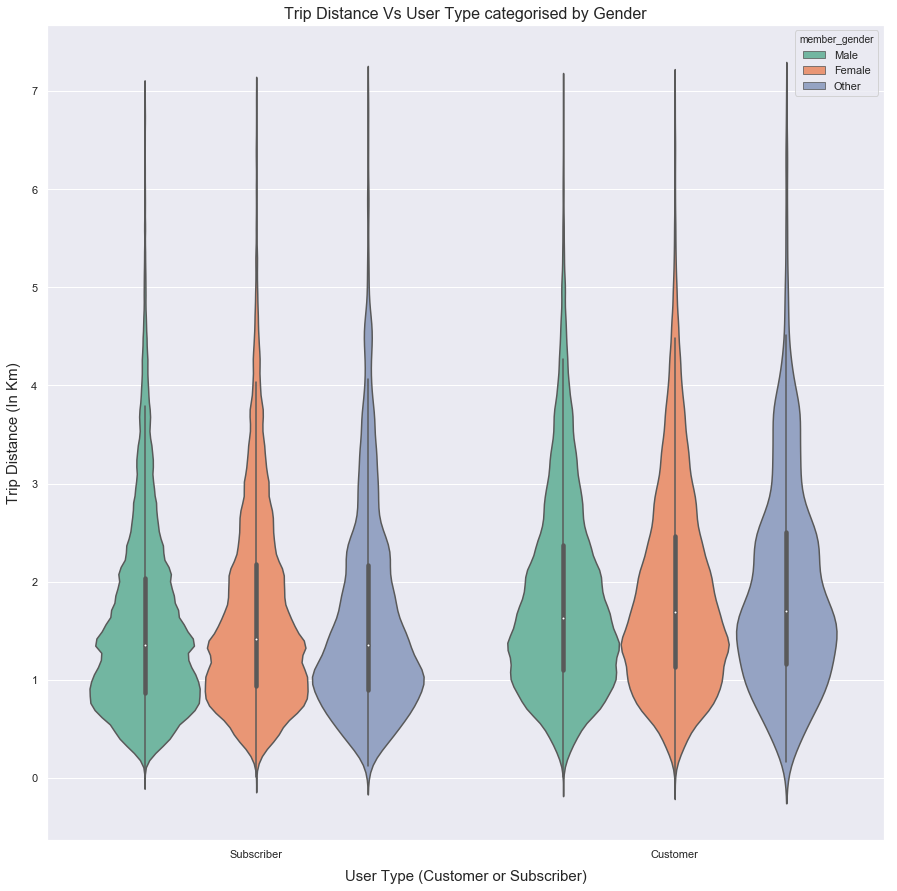

In [88]:
plt.figure(figsize=(15,15))
sb.violinplot(x='user_type',y='distance_km',hue='member_gender',data=gobike,palette='Set2');
plt.xlabel("User Type (Customer or Subscriber)",fontsize=15,labelpad=10)
plt.ylabel("Trip Distance (In Km)",fontsize=15,labelpad=10)
plt.title("Trip Distance Vs User Type categorised by Gender",fontsize=16);

> Interestingly, customers have ride for longer distance compared to subscriber. This indicates an important fact that subscriber generally have taken ride for their daily work like office or school. Customers are not regular but they might have taken ride to roam around city to explore it. Female and other category  customers or subscribers have travelled longer distance. 

### 4. How trip duration relates with different time of the day and effect of gender on this relation?

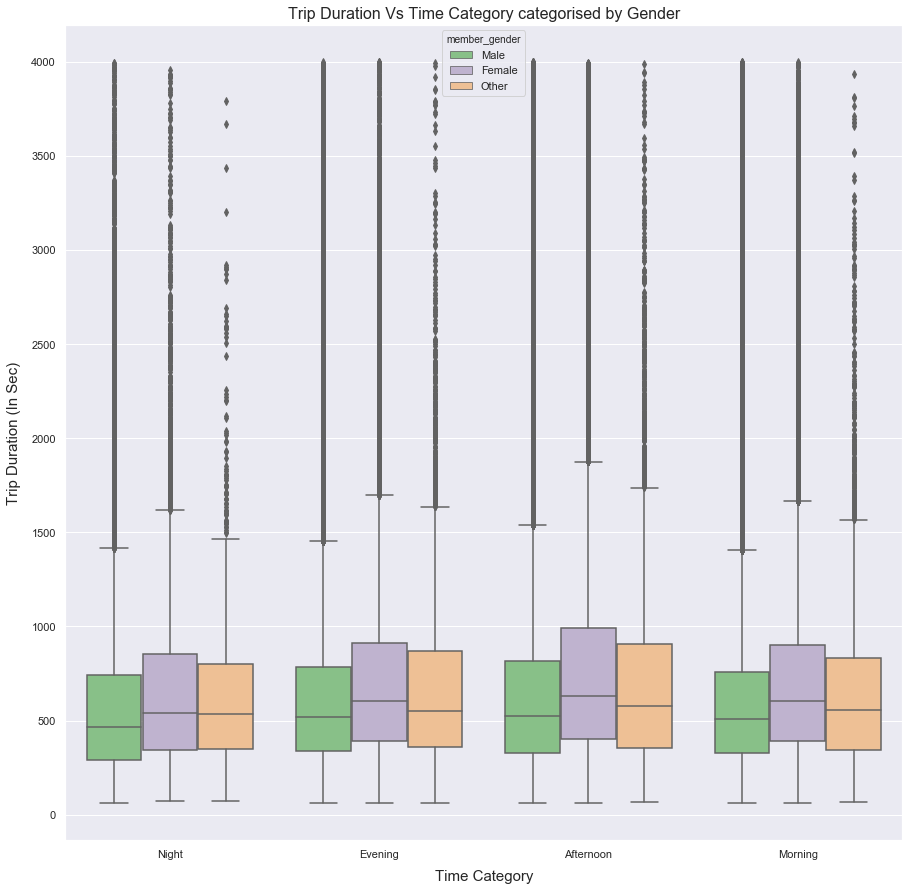

In [89]:
plt.figure(figsize=(15,15))
sb.boxplot(data=gobike,y='duration_sec',x='time_category',hue='member_gender',palette='Accent');
plt.xlabel("Time Category",fontsize=15,labelpad=10)
plt.ylabel("Trip Duration (In Sec)",fontsize=15,labelpad=10)
plt.title("Trip Duration Vs Time Category categorised by Gender",fontsize=16);

> A comparison of Trip duration and  Time Category shows longer trip during afternoon and female having longer trip duration.

### 5. Analysis of trends of trip count based on Gender, User Type, Age Group and Time Category. 

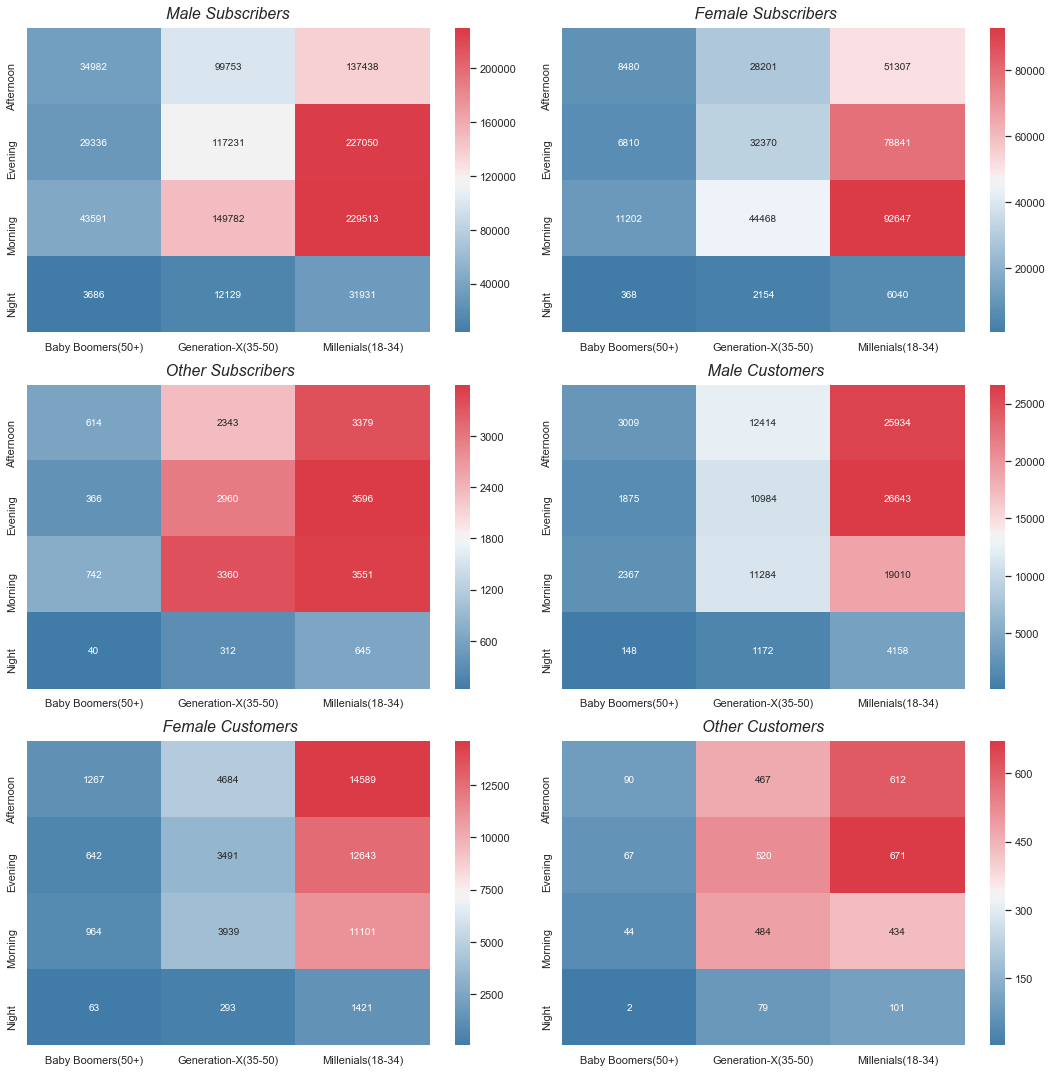

In [116]:
plt.figure(figsize=(15,15))
gobike_sub_male=gobike.query('user_type=="Subscriber" and member_gender=="Male"')
gobike_sub_female=gobike.query('user_type=="Subscriber" and member_gender=="Female"')
gobike_sub_other=gobike.query('user_type=="Subscriber" and member_gender=="Other"')
gobike_cus_male=gobike.query('user_type=="Customer" and member_gender=="Male"')
gobike_cus_female=gobike.query('user_type=="Customer" and member_gender=="Female"')
gobike_cus_other=gobike.query('user_type=="Customer" and member_gender=="Other"')

pivot_sub_male=pd.pivot_table(gobike_sub_male,index='time_category',columns='age_group',values='bike_id',aggfunc='count');
pivot_sub_female=pd.pivot_table(gobike_sub_female,index='time_category',columns='age_group',values='bike_id',aggfunc='count');
pivot_sub_other=pd.pivot_table(gobike_sub_other,index='time_category',columns='age_group',values='bike_id',aggfunc='count');
pivot_cus_male=pd.pivot_table(gobike_cus_male,index='time_category',columns='age_group',values='bike_id',aggfunc='count');
pivot_cus_female=pd.pivot_table(gobike_cus_female,index='time_category',columns='age_group',values='bike_id',aggfunc='count');
pivot_cus_other=pd.pivot_table(gobike_cus_other,index='time_category',columns='age_group',values='bike_id',aggfunc='count');

cmap = sb.diverging_palette(240, 10, as_cmap=True);
plt.subplot(321)                       
sb.heatmap(pivot_sub_male,annot=True,cmap=cmap,fmt='.0f',annot_kws={'size':10});
plt.xlabel("",fontsize=15,labelpad=10)
plt.ylabel("",fontsize=15,labelpad=10)
plt.title("Male Subscribers",fontsize=16,loc='center',pad=10.0,style='italic');

plt.subplot(322)  
sb.heatmap(pivot_sub_female,annot=True,cmap=cmap,fmt='.0f',annot_kws={'size':10});
plt.xlabel("",fontsize=15,labelpad=10)
plt.ylabel("",fontsize=15,labelpad=10)
plt.title(" Female Subscribers",fontsize=16,loc='center',pad=10.0,style='italic');

plt.subplot(323)  
sb.heatmap(pivot_sub_other,annot=True,cmap=cmap,fmt='.0f',annot_kws={'size':10});
plt.xlabel("",fontsize=15,labelpad=10)
plt.ylabel("",fontsize=15,labelpad=10)
plt.title(" Other Subscribers",fontsize=16,loc='center',pad=10.0,style='italic');

plt.subplot(324)  
sb.heatmap(pivot_cus_male,annot=True,cmap=cmap,fmt='.0f',annot_kws={'size':10});
plt.xlabel("",fontsize=15,labelpad=10)
plt.ylabel("",fontsize=15,labelpad=10)
plt.title(" Male Customers",fontsize=16,loc='center',pad=10.0,style='italic');

plt.subplot(325)  
sb.heatmap(pivot_cus_female,annot=True,cmap=cmap,fmt='.0f',annot_kws={'size':10});
plt.xlabel("",fontsize=15,labelpad=10)
plt.ylabel("",fontsize=15,labelpad=10)
plt.title(" Female Customers",fontsize=16,loc='center',pad=10.0,style='italic');

plt.subplot(326)  
sb.heatmap(pivot_cus_other,annot=True,cmap=cmap,fmt='.0f',annot_kws={'size':10});
plt.xlabel("",fontsize=15,labelpad=10)
plt.ylabel("",fontsize=15,labelpad=10)
plt.title("Other Customers",fontsize=16,loc='center',pad=10.0,style='italic');
plt.tight_layout()

> This is sort of summarisation of key findings in previous analysis and reinforce it. At day level, if I see then Morning, Evening and Afternoon are pick time. If I see age wise the millenials(18-34) are major section which are using bike share service. Now moving to user type, Subscribers those belongs to millenials age group are using the bike share service most and their pick time is morning and evening. This trends is persist in further classication on gender basis. In contrast, Most Customers belongs to millenials age group but pick time is evening and afternoon.This trends is persist in further classication on gender basis.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> At day level, if I see then Morning, Evening and Afternoon are pick time. If I see age wise the millenials(18-34) are major section which are using bike share service. Now moving to user type, Subscribers those belongs to millenials age group are using the bike share service most and their pick time is morning and evening. This trends is persist in further classication on gender basis. In contrast, Most Customers belongs to millenials age group but pick time is evening and afternoon.This trends is persist in further classication on gender basis.

### Were there any interesting or surprising interactions between features?

> I can see Bike_share_for_All subscribers have different trends than normal subscribers.Bike_share_for_All subscribers are more likely use this system in the afternoon or evening compared to normal subscribers which prefer morning time.

> Interestingly, customers have ride for longer trip duration compared to subscriber. This indicates an important fact that subscriber generally have taken ride for their daily work like office or school. Customers are not regular but they might have taken ride to roam around city to explore it. Female  customers or subscribers have taken longer trip time.

> Interestingly, customers have ride for longer distance compared to subscriber. This indicates an important fact that subscriber generally have taken ride for their daily work like office or school. Customers are not regular but they might have taken ride to roam around city to explore it. Female and other category customers or subscribers have travelled longer distance.

In [90]:
#gobike.to_csv('gobike_wrangled.csv')

> Reference: 
1. https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
2. https://janakiev.com/blog/gps-points-distance-python/
3. https://engineering.upside.com/a-beginners-guide-to-optimizing-pandas-code-for-speed-c09ef2c6a4d6
4. http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
5. https://www.dataquest.io/blog/pandas-pivot-table/